Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [156]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [158]:
df.shape

(1000, 40)

In [159]:
print("No.of rows in the dataset",df.shape[0])
print("No.of columns in the dataset",df.shape[1])

No.of rows in the dataset 1000
No.of columns in the dataset 40


The Dataset Contains 1000 rows and 40 columns where 39 are independent variables and 1 is target variable

In [160]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

This dataset contains three types of data:int64,float64 and object

In [161]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no null values present in our dataset except _c_39 so dropping this column

In [162]:
df.drop('_c39',axis=1,inplace=True)

In [163]:
df.shape

(1000, 39)

Now we have 1000 rows and 39 columns

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can clearly see that there is no missing data presemt in our dataset lets check with heatmap as well

<Axes: >

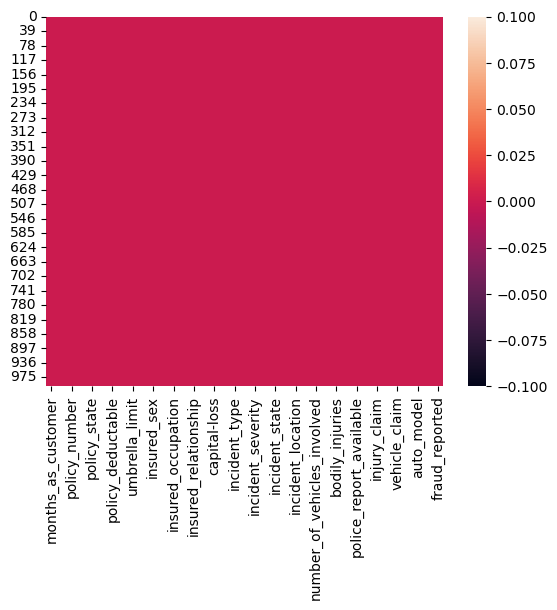

In [165]:
sns.heatmap(df.isnull())

From the heatmap it is clear that there is no  missing value present in our datset

In [166]:
df.nunique().to_frame("No of Unique Values")

No of Unique Values
months_as_customer                           391
age                                           46
policy_number                               1000
policy_bind_date                             951
policy_state                                   3
policy_csl                                     3
policy_deductable                              3
policy_annual_premium                        991
umbrella_limit                                11
insured_zip                                  995
insured_sex                                    2
insured_education_level                        7
insured_occupation                            14
insured_hobbies                               20
insured_relationship                           6
capital-gains                                338
capital-loss                                 354
incident_date                                 60
incident_type                                  4
collision_type                                 4
incident_severity                              4
authorities_contacted                          5
incident_state                                 7
incident_city                                  7
incident_location                           1000
incident_hour_of_the_day                      24
number_of_vehicles_involved                    4
property_damage                                3
bodily_injuries                                3
witnesses                                      4
police_report_available                        3
total_claim_amount                           763
injury_claim                                 638
property_claim                               626
vehicle_claim                                726
auto_make                                     14
auto_model                                    39
auto_year                                     21
fraud_reported                                 2

Some of the rows have '?' so replacing it with Nill

In [167]:
df=df.replace('?','Nill')

In [168]:
df.duplicated().sum()

0

In [169]:
df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

From the above we observe that:
1.The count is same for all the columns which means there are no missing values present in the dataset
2.The Mean value is greater than the median(50%) in most of the columns which means the data is skewed to right in these columns
3.The Mean value less than median(50%) in some that means the data is skewed to left for these columns
4.There is huge difference between 75% and max in most of the columns hence there are outliers present in the dataset

It is observed that there is one row in negative value  for umbrella_limit so dropping that row

In [170]:
df.drop(df[df['umbrella_limit']== -1000000].index,inplace=True)

Dividing 'incident_data' into three other columns

In [171]:
df['incident_Date']=df['incident_date'].str.split('-').str[0]
df['incident_Month']=df['incident_date'].str.split('-').str[1]
df['incident_Year']=df['incident_date'].str.split('-').str[2]

In incident data all the incident is from 2015 so droping the incident_year

In [172]:
df['incident_Year'].value_counts()
df.drop('incident_Year',axis=1,inplace=True)

Dividing policy_bind_date into three other columns

In [173]:
df['policy_bind_Date']=df['policy_bind_date'].str.split('-').str[0]
df['policy_bind_Month']=df['policy_bind_date'].str.split('-').str[1]
df['policy_bind_Year']=df['policy_bind_date'].str.split('-').str[2]

Droping policy_bind_date column

In [174]:
df.drop('policy_bind_date',axis=1,inplace=True)

Droping the policy_number and other columns which plays no role in prediction of target

In [175]:
df.drop(['policy_number','insured_zip','incident_location'],axis=1,inplace=True)

In [176]:
df.shape

(999, 40)

Now we have 999 rows and 40 columns 

UniVarient Analysis

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64 

194    0.800801
128    0.700701
254    0.700701
140    0.700701
210    0.700701
         ...   
390    0.100100
411    0.100100
453    0.100100
448    0.100100
17     0.100100
Name: months_as_customer, Length: 391, dtype: float64


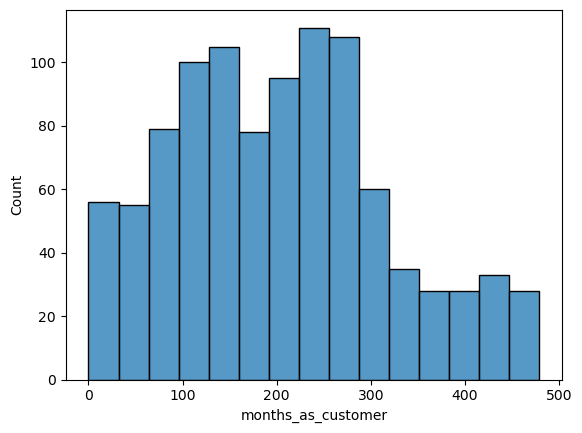

In [177]:
sns.histplot(df['months_as_customer'])
print(df['months_as_customer'].value_counts(),'\n')
print(df['months_as_customer'].value_counts(normalize=True)*100)

From the above graph we see that months_as_customer are 100-250 months old

43    49
39    48
41    45
34    44
31    42
38    42
30    42
37    41
33    39
40    38
32    38
29    35
46    33
35    32
36    32
44    32
42    31
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64 

43    4.904905
39    4.804805
41    4.504505
34    4.404404
31    4.204204
38    4.204204
30    4.204204
37    4.104104
33    3.903904
40    3.803804
32    3.803804
29    3.503504
46    3.303303
35    3.203203
36    3.203203
44    3.203203
42    3.103103
28    3.003003
26    2.602603
45    2.602603
48    2.502503
47    2.402402
27    2.402402
57    1.601602
25    1.401401
55    1.401401
49    1.401401
53    1.301301
50    1.301301
24    1.001001
54    1.001001
61    1.001001
51    0.900901
60    0.900901
58    0.800801
56    0.800801
23    0.700701
21   

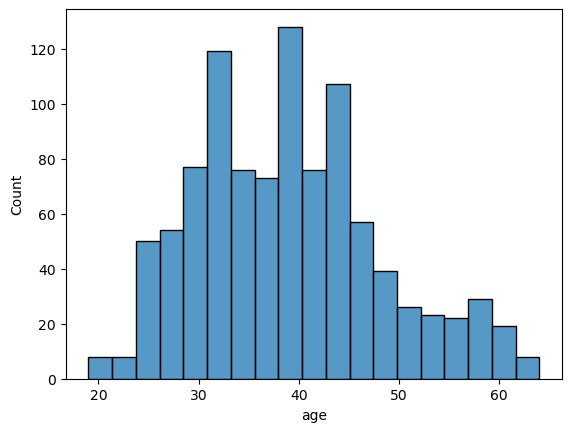

In [178]:
sns.histplot(df['age'])
print(df['age'].value_counts(),'\n')
print(df['age'].value_counts(normalize=True)*100)

From the above plot we see that age is mostly between 26-50

12    95
08    93
07    91
02    90
11    85
04    83
01    83
06    80
03    79
10    78
09    74
05    68
Name: policy_bind_Month, dtype: int64 

12    9.509510
08    9.309309
07    9.109109
02    9.009009
11    8.508509
04    8.308308
01    8.308308
06    8.008008
03    7.907908
10    7.807808
09    7.407407
05    6.806807
Name: policy_bind_Month, dtype: float64


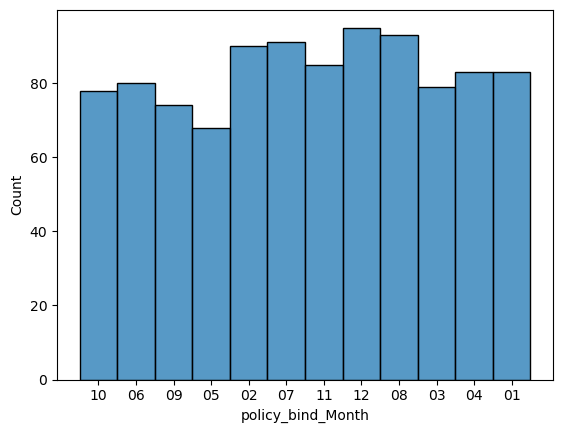

In [179]:
sns.histplot(df['policy_bind_Month'])
print(df['policy_bind_Month'].value_counts(),'\n')
print(df['policy_bind_Month'].value_counts(normalize=True)*100)

From the above we see that policy bind month is mostly 12&8

1991    55
2002    50
1992    48
1990    48
1997    44
2014    43
2009    43
1996    43
2001    41
2006    41
1994    41
2005    40
1999    40
2007    40
2010    38
1995    38
2003    37
2004    36
2012    36
2013    35
2008    33
1993    33
2011    32
2000    31
1998    30
2015     3
Name: policy_bind_Year, dtype: int64 

1991    5.505506
2002    5.005005
1992    4.804805
1990    4.804805
1997    4.404404
2014    4.304304
2009    4.304304
1996    4.304304
2001    4.104104
2006    4.104104
1994    4.104104
2005    4.004004
1999    4.004004
2007    4.004004
2010    3.803804
1995    3.803804
2003    3.703704
2004    3.603604
2012    3.603604
2013    3.503504
2008    3.303303
1993    3.303303
2011    3.203203
2000    3.103103
1998    3.003003
2015    0.300300
Name: policy_bind_Year, dtype: float64


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

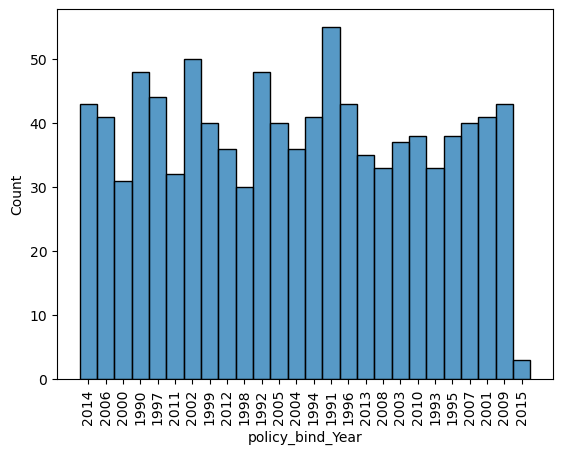

In [180]:
sns.histplot(df['policy_bind_Year'])
print(df['policy_bind_Year'].value_counts(),'\n')
print(df['policy_bind_Year'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that policy bind year is mostly 2014,2006,1990,2002,1999,2012,1998,1994,2008,2003

OH    351
IL    338
IN    310
Name: policy_state, dtype: int64 

OH    35.135135
IL    33.833834
IN    31.031031
Name: policy_state, dtype: float64


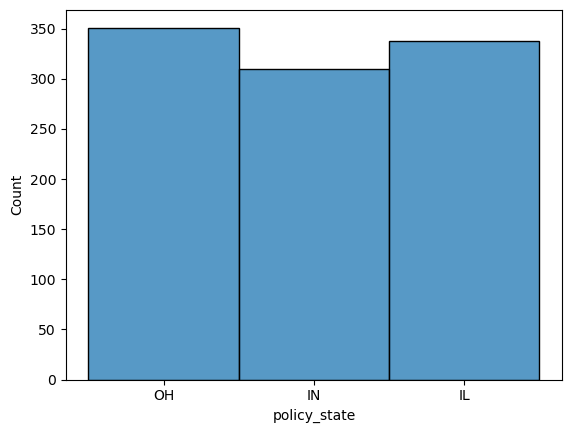

In [181]:
sns.histplot(df['policy_state'])
print(df['policy_state'].value_counts(),'\n')
print(df['policy_state'].value_counts(normalize=True)*100)

From the above we see that policy state is 3 states is almost same 

250/500     351
100/300     348
500/1000    300
Name: policy_csl, dtype: int64 

250/500     35.135135
100/300     34.834835
500/1000    30.030030
Name: policy_csl, dtype: float64


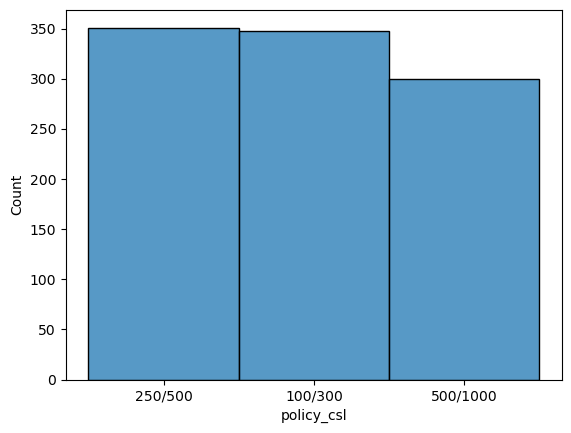

In [182]:
sns.histplot(df['policy_csl'])
print(df['policy_csl'].value_counts(),'\n')
print(df['policy_csl'].value_counts(normalize=True)*100)

From the above we see that policy_csl is of 3csl is almost same

1000    351
500     341
2000    307
Name: policy_deductable, dtype: int64 

1000    35.135135
500     34.134134
2000    30.730731
Name: policy_deductable, dtype: float64


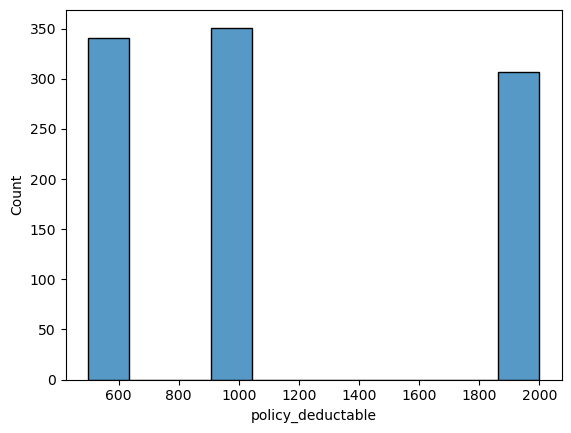

In [183]:
sns.histplot(df['policy_deductable'])
print(df['policy_deductable'].value_counts(),'\n')
print(df['policy_deductable'].value_counts(normalize=True)*100)

Here we see thst policy_deductable is high around 1000

1558.29    2
1215.36    2
1362.87    2
1073.83    2
1389.13    2
          ..
1437.33    1
988.29     1
1238.89    1
1384.64    1
766.19     1
Name: policy_annual_premium, Length: 990, dtype: int64 

1558.29    0.2002
1215.36    0.2002
1362.87    0.2002
1073.83    0.2002
1389.13    0.2002
            ...  
1437.33    0.1001
988.29     0.1001
1238.89    0.1001
1384.64    0.1001
766.19     0.1001
Name: policy_annual_premium, Length: 990, dtype: float64


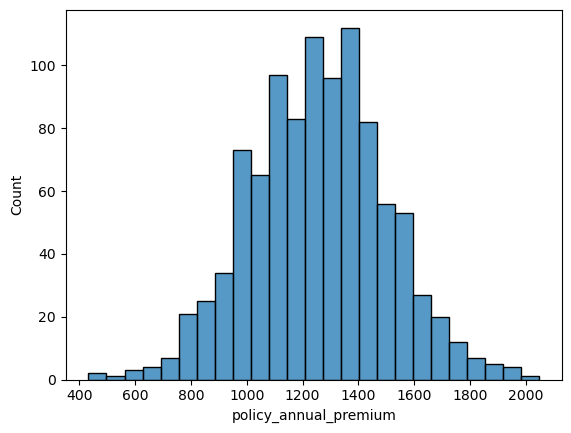

In [184]:
sns.histplot(df['policy_annual_premium'])
print(df['policy_annual_premium'].value_counts(),'\n')
print(df['policy_annual_premium'].value_counts(normalize=True)*100)

Here we see policy_annual_premium is high around 1400

FEMALE    537
MALE      462
Name: insured_sex, dtype: int64 

FEMALE    53.753754
MALE      46.246246
Name: insured_sex, dtype: float64


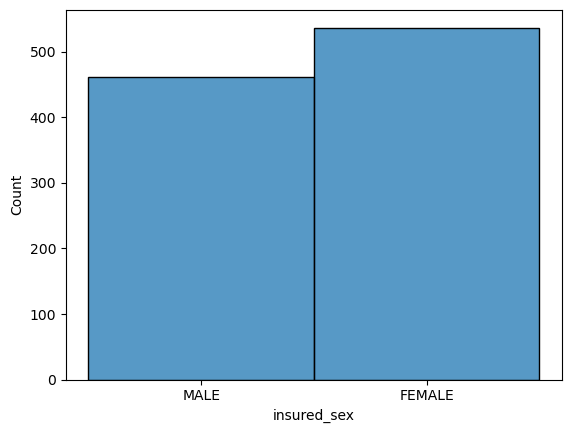

In [185]:
sns.histplot(df['insured_sex'])
print(df['insured_sex'].value_counts(),'\n')
print(df['insured_sex'].value_counts(normalize=True)*100)

From the above we see that female are more than male

JD             161
High School    160
MD             144
Associate      144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64 

JD             16.116116
High School    16.016016
MD             14.414414
Associate      14.414414
Masters        14.314314
PhD            12.512513
College        12.212212
Name: insured_education_level, dtype: float64


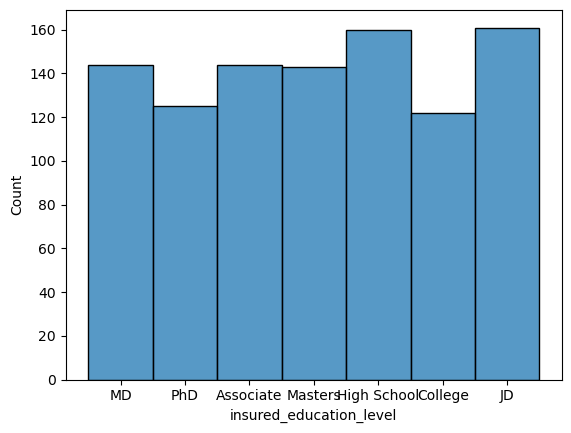

In [186]:
sns.histplot(df['insured_education_level'])
print(df['insured_education_level'].value_counts(),'\n')
print(df['insured_education_level'].value_counts(normalize=True)*100)

Here we conclude that most are high school and least in phd

machine-op-inspct    92
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64 

machine-op-inspct    9.209209
prof-specialty       8.508509
tech-support         7.807808
sales                7.607608
exec-managerial      7.607608
craft-repair         7.407407
transport-moving     7.207207
other-service        7.107107
priv-house-serv      7.107107
armed-forces         6.906907
adm-clerical         6.506507
protective-serv      6.306306
handlers-cleaners    5.405405
farming-fishing      5.305305
Name: insured_occupation, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

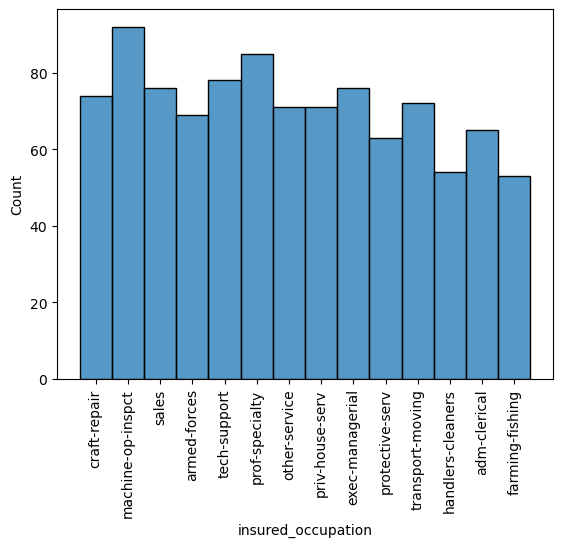

In [187]:
sns.histplot(df['insured_occupation'])
print(df['insured_occupation'].value_counts(),'\n')
print(df['insured_occupation'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

Here we see that occupation is high of machine-op-inspct

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          53
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64 

reading           6.406406
exercise          5.705706
paintball         5.705706
bungie-jumping    5.605606
movies            5.505506
golf              5.505506
camping           5.505506
kayaking          5.305305
yachting          5.305305
hiking            5.205205
video-games       5.005005
skydiving         4.904905
base-jumping      4.904905
board-games       4.804805
polo              4.704705
chess             4.604605
dancing           4.304304
sleeping          4.104104
cross-fit         3.503504
basketball        3.403403
Na

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

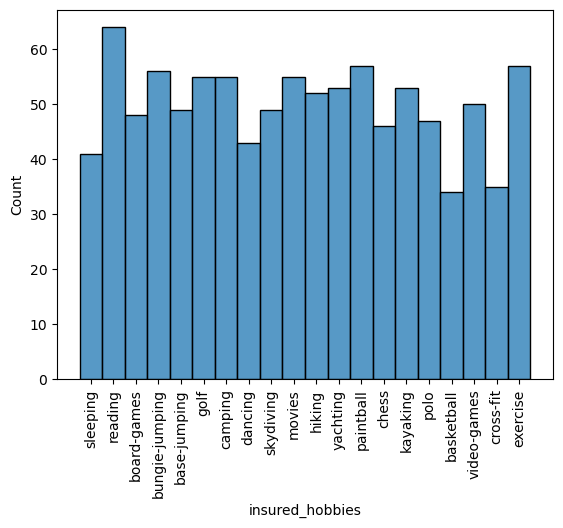

In [188]:
sns.histplot(df['insured_hobbies'])
print(df['insured_hobbies'].value_counts(),'\n')
print(df['insured_hobbies'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above plot we see that that the insured hobbies are mostly reading,boardgames,basejumping,yetching,paintball,crossfit

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              154
unmarried         141
Name: insured_relationship, dtype: int64 

own-child         18.318318
other-relative    17.717718
not-in-family     17.417417
husband           17.017017
wife              15.415415
unmarried         14.114114
Name: insured_relationship, dtype: float64


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

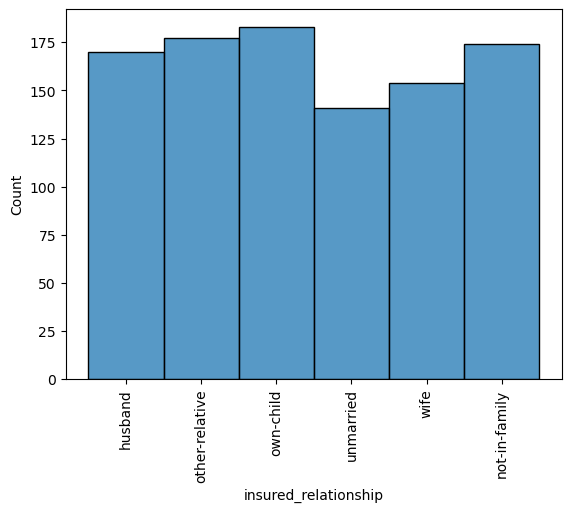

In [189]:
sns.histplot(df['insured_relationship'])
print(df['insured_relationship'].value_counts(),'\n')
print(df['insured_relationship'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that insured relationship is mostly of others and wife

0        507
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64 

0        50.750751
46300     0.500501
51500     0.400400
68500     0.400400
55600     0.300300
           ...    
36700     0.100100
54900     0.100100
69200     0.100100
48800     0.100100
50300     0.100100
Name: capital-gains, Length: 338, dtype: float64


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

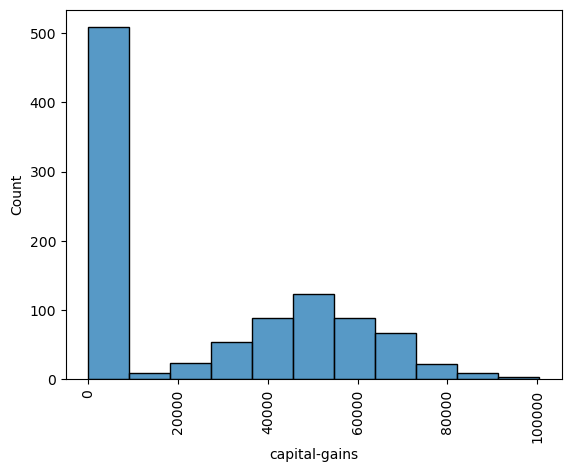

In [190]:
sns.histplot(df['capital-gains'])
print(df['capital-gains'].value_counts(),'\n')
print(df['capital-gains'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that capital-gains is mostly 0 to 50000

 0        474
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64 

 0        47.447447
-31700     0.500501
-53700     0.500501
-50300     0.500501
-45300     0.400400
            ...    
-12100     0.100100
-17000     0.100100
-72900     0.100100
-19700     0.100100
-82100     0.100100
Name: capital-loss, Length: 354, dtype: float64


(array([-120000., -100000.,  -80000.,  -60000.,  -40000.,  -20000.,
              0.,   20000.]),
 [Text(-120000.0, 0, '−120000'),
  Text(-100000.0, 0, '−100000'),
  Text(-80000.0, 0, '−80000'),
  Text(-60000.0, 0, '−60000'),
  Text(-40000.0, 0, '−40000'),
  Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000')])

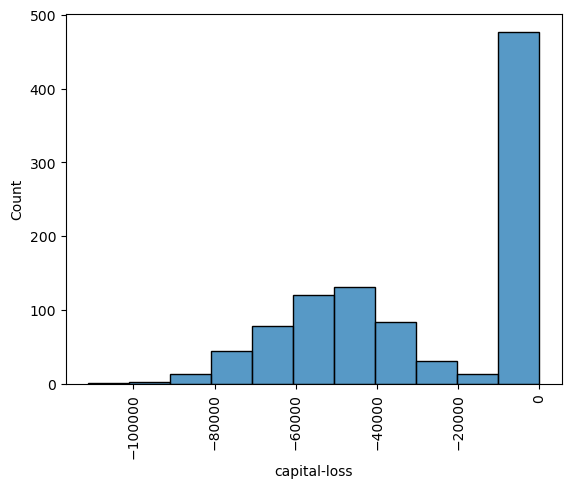

In [191]:
sns.histplot(df['capital-loss'])
print(df['capital-loss'].value_counts(),'\n')
print(df['capital-loss'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that capital-loss is around 40000 to 60000

Multi-vehicle Collision     419
Single Vehicle Collision    402
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64 

Multi-vehicle Collision     41.941942
Single Vehicle Collision    40.240240
Vehicle Theft                9.409409
Parked Car                   8.408408
Name: incident_type, dtype: float64


([0, 1, 2, 3],
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

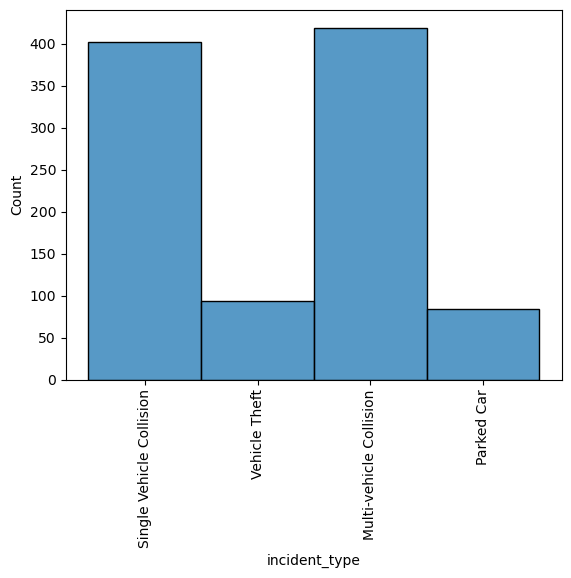

In [192]:
sns.histplot(df['incident_type'])
print(df['incident_type'].value_counts(),'\n')
print(df['incident_type'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that incident_type is mostly Single Vehicle,Collision,Multi-Vehicle

Rear Collision     292
Side Collision     275
Front Collision    254
Nill               178
Name: collision_type, dtype: int64 

Rear Collision     29.229229
Side Collision     27.527528
Front Collision    25.425425
Nill               17.817818
Name: collision_type, dtype: float64


([0, 1, 2, 3],
 [Text(0, 0, 'Side Collision'),
  Text(1, 0, 'Nill'),
  Text(2, 0, 'Rear Collision'),
  Text(3, 0, 'Front Collision')])

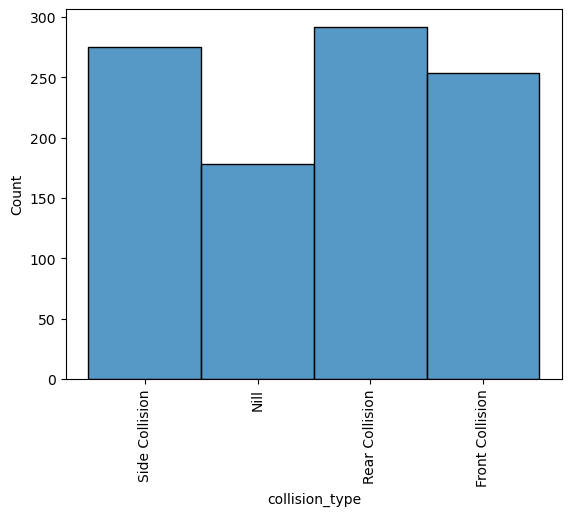

In [193]:
sns.histplot(df['collision_type'])
print(df['collision_type'].value_counts(),'\n')
print(df['collision_type'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that collision type are side,rear and front

Minor Damage      354
Total Loss        280
Major Damage      275
Trivial Damage     90
Name: incident_severity, dtype: int64 

Minor Damage      35.435435
Total Loss        28.028028
Major Damage      27.527528
Trivial Damage     9.009009
Name: incident_severity, dtype: float64


([0, 1, 2, 3],
 [Text(0, 0, 'Major Damage'),
  Text(1, 0, 'Minor Damage'),
  Text(2, 0, 'Total Loss'),
  Text(3, 0, 'Trivial Damage')])

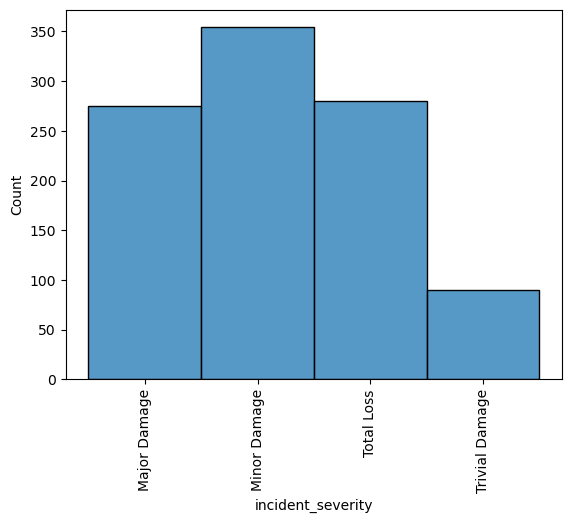

In [194]:
sns.histplot(df['incident_severity'])
print(df['incident_severity'].value_counts(),'\n')
print(df['incident_severity'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that incident_severity were more in minor damage 

Police       292
Fire         223
Other        198
Ambulance    195
None          91
Name: authorities_contacted, dtype: int64 

Police       29.229229
Fire         22.322322
Other        19.819820
Ambulance    19.519520
None          9.109109
Name: authorities_contacted, dtype: float64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Police'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Fire'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Ambulance')])

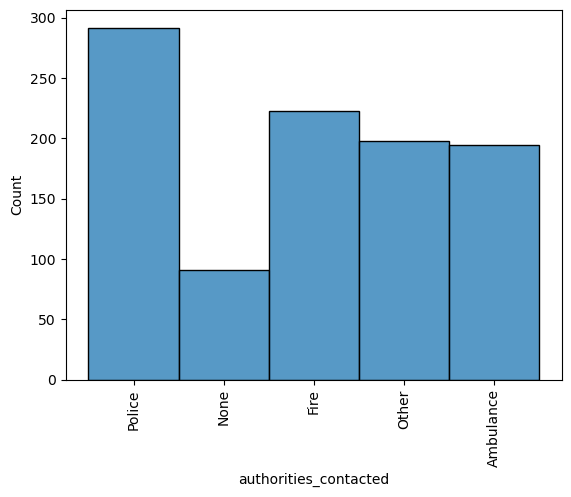

In [195]:
sns.histplot(df['authorities_contacted'])
print(df['authorities_contacted'].value_counts(),'\n')
print(df['authorities_contacted'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that authorities_contacted were fire,other and Ambulance 

NY    262
SC    248
WV    217
VA    110
NC    109
PA     30
OH     23
Name: incident_state, dtype: int64 

NY    26.226226
SC    24.824825
WV    21.721722
VA    11.011011
NC    10.910911
PA     3.003003
OH     2.302302
Name: incident_state, dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'SC'),
  Text(1, 0, 'VA'),
  Text(2, 0, 'NY'),
  Text(3, 0, 'OH'),
  Text(4, 0, 'WV'),
  Text(5, 0, 'NC'),
  Text(6, 0, 'PA')])

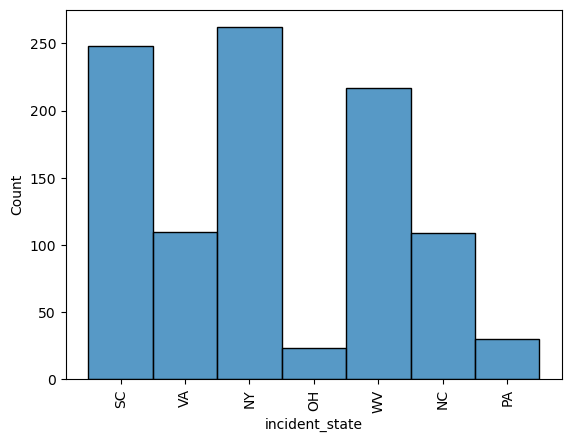

In [196]:
sns.histplot(df['incident_state'])
print(df['incident_state'].value_counts(),'\n')
print(df['incident_state'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that fraud reported were in state SC,NY,OH,NC,PA 

Springfield    157
Arlington      151
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64 

Springfield    15.715716
Arlington      15.115115
Columbus       14.914915
Northbend      14.514515
Hillsdale      14.114114
Riverwood      13.413413
Northbrook     12.212212
Name: incident_city, dtype: float64


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Columbus'),
  Text(1, 0, 'Riverwood'),
  Text(2, 0, 'Arlington'),
  Text(3, 0, 'Springfield'),
  Text(4, 0, 'Hillsdale'),
  Text(5, 0, 'Northbend'),
  Text(6, 0, 'Northbrook')])

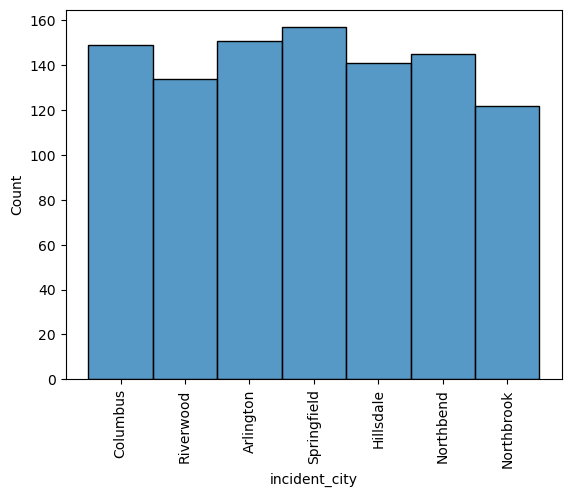

In [197]:
sns.histplot(df['incident_city'])
print(df['incident_city'].value_counts(),'\n')
print(df['incident_city'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that reported fraud were same in all the cities

17    54
3     53
0     52
23    51
16    49
10    46
4     46
13    45
6     44
9     43
14    43
21    42
18    41
12    40
19    40
7     40
15    39
22    38
8     36
20    34
5     33
2     31
11    30
1     29
Name: incident_hour_of_the_day, dtype: int64 

17    5.405405
3     5.305305
0     5.205205
23    5.105105
16    4.904905
10    4.604605
4     4.604605
13    4.504505
6     4.404404
9     4.304304
14    4.304304
21    4.204204
18    4.104104
12    4.004004
19    4.004004
7     4.004004
15    3.903904
22    3.803804
8     3.603604
20    3.403403
5     3.303303
2     3.103103
11    3.003003
1     2.902903
Name: incident_hour_of_the_day, dtype: float64


(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(-5.0, 0, '−5'),
  Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25')])

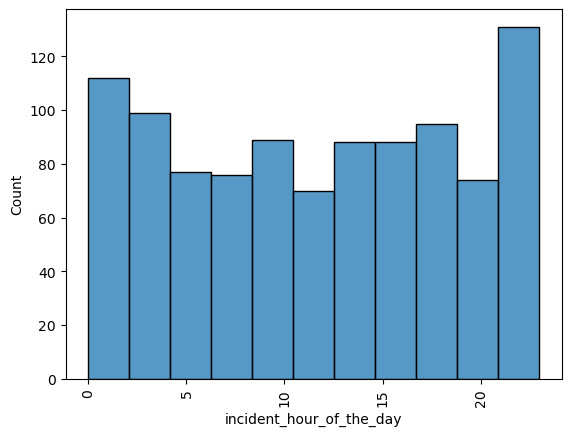

In [198]:
sns.histplot(df['incident_hour_of_the_day'])
print(df['incident_hour_of_the_day'].value_counts(),'\n')
print(df['incident_hour_of_the_day'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that incident_hour_of_the_day is mostly 20 or more

1    580
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64 

1    58.058058
3    35.835836
4     3.103103
2     3.003003
Name: number_of_vehicles_involved, dtype: float64


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5'),
  Text(4.0, 0, '4.0'),
  Text(4.5, 0, '4.5')])

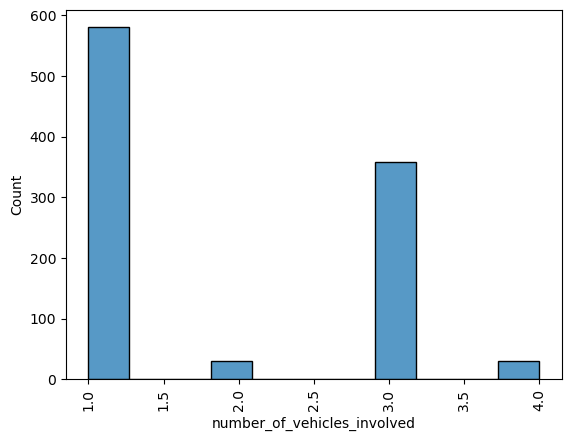

In [199]:
sns.histplot(df['number_of_vehicles_involved'])
print(df['number_of_vehicles_involved'].value_counts(),'\n')
print(df['number_of_vehicles_involved'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that number-of-vehicles-involved were more than 1

Nill    360
NO      338
YES     301
Name: property_damage, dtype: int64 

Nill    36.036036
NO      33.833834
YES     30.130130
Name: property_damage, dtype: float64


([0, 1, 2], [Text(0, 0, 'YES'), Text(1, 0, 'Nill'), Text(2, 0, 'NO')])

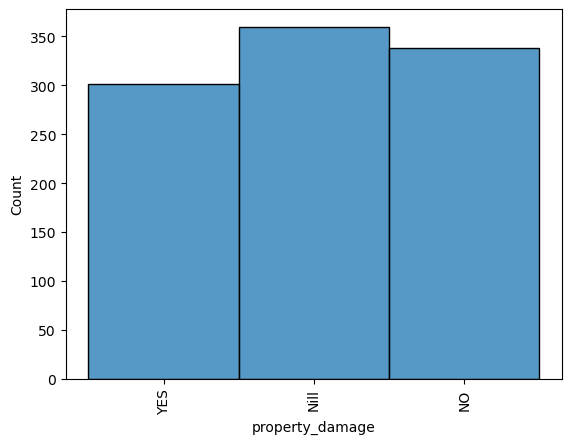

In [200]:
sns.histplot(df['property_damage'])
print(df['property_damage'].value_counts(),'\n')
print(df['property_damage'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that property_damage mostly nill

0    339
2    332
1    328
Name: bodily_injuries, dtype: int64 

0    33.933934
2    33.233233
1    32.832833
Name: bodily_injuries, dtype: float64


(array([-0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,
         2.  ,  2.25]),
 [Text(-0.25, 0, '−0.25'),
  Text(0.0, 0, '0.00'),
  Text(0.25, 0, '0.25'),
  Text(0.5, 0, '0.50'),
  Text(0.75, 0, '0.75'),
  Text(1.0, 0, '1.00'),
  Text(1.25, 0, '1.25'),
  Text(1.5, 0, '1.50'),
  Text(1.75, 0, '1.75'),
  Text(2.0, 0, '2.00'),
  Text(2.25, 0, '2.25')])

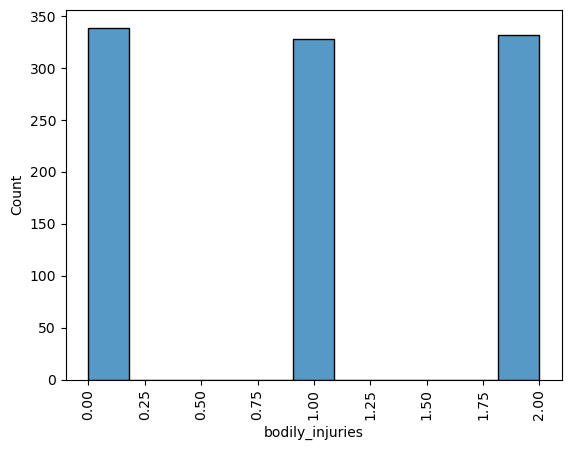

In [201]:
sns.histplot(df['bodily_injuries'])
print(df['bodily_injuries'].value_counts(),'\n')
print(df['bodily_injuries'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that bodily injuries are around 300 to 350

1    257
2    250
0    249
3    243
Name: witnesses, dtype: int64 

1    25.725726
2    25.025025
0    24.924925
3    24.324324
Name: witnesses, dtype: float64


(array([-0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 [Text(-0.5, 0, '−0.5'),
  Text(0.0, 0, '0.0'),
  Text(0.5, 0, '0.5'),
  Text(1.0, 0, '1.0'),
  Text(1.5, 0, '1.5'),
  Text(2.0, 0, '2.0'),
  Text(2.5, 0, '2.5'),
  Text(3.0, 0, '3.0'),
  Text(3.5, 0, '3.5')])

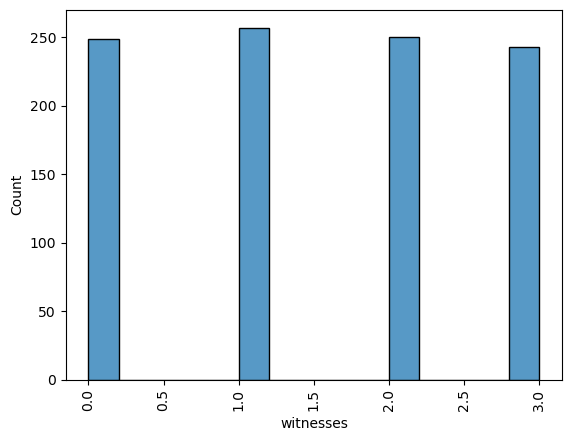

In [202]:
sns.histplot(df['witnesses'])
print(df['witnesses'].value_counts(),'\n')
print(df['witnesses'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that no.of witnesses are mostly 1 or more

NO      343
Nill    342
YES     314
Name: police_report_available, dtype: int64 

NO      34.334334
Nill    34.234234
YES     31.431431
Name: police_report_available, dtype: float64


([0, 1, 2], [Text(0, 0, 'YES'), Text(1, 0, 'Nill'), Text(2, 0, 'NO')])

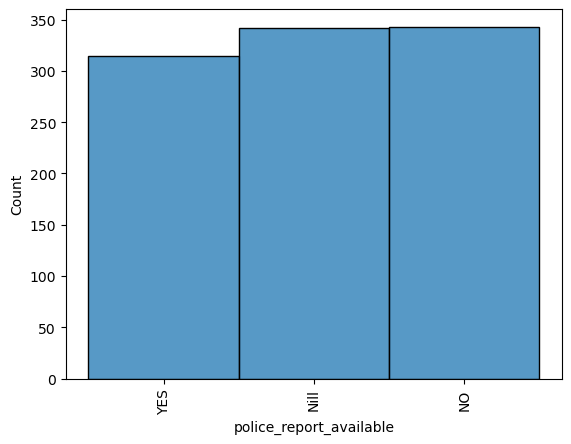

In [203]:
sns.histplot(df['police_report_available'])
print(df['police_report_available'].value_counts(),'\n')
print(df['police_report_available'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that most cases police report is not available

59400    5
3190     4
60600    4
70400    4
70290    4
        ..
87100    1
6240     1
66600    1
70920    1
67500    1
Name: total_claim_amount, Length: 762, dtype: int64 

59400    0.500501
3190     0.400400
60600    0.400400
70400    0.400400
70290    0.400400
           ...   
87100    0.100100
6240     0.100100
66600    0.100100
70920    0.100100
67500    0.100100
Name: total_claim_amount, Length: 762, dtype: float64


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000.]),
 [Text(-20000.0, 0, '−20000'),
  Text(0.0, 0, '0'),
  Text(20000.0, 0, '20000'),
  Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000'),
  Text(140000.0, 0, '140000')])

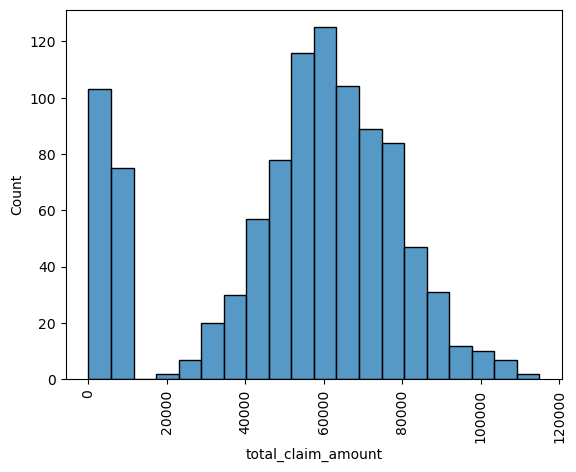

In [204]:
sns.histplot(df['total_claim_amount'])
print(df['total_claim_amount'].value_counts(),'\n')
print(df['total_claim_amount'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

Here we see that total_claim_amount is around 50000 to 70000

0        25
480       7
640       7
580       5
860       5
         ..
6580      1
11820     1
16650     1
7810      1
7500      1
Name: injury_claim, Length: 638, dtype: int64 

0        2.502503
480      0.700701
640      0.700701
580      0.500501
860      0.500501
           ...   
6580     0.100100
11820    0.100100
16650    0.100100
7810     0.100100
7500     0.100100
Name: injury_claim, Length: 638, dtype: float64


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000')])

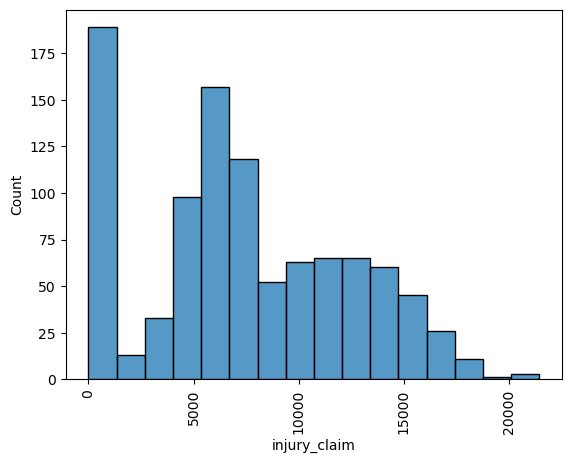

In [205]:
sns.histplot(df['injury_claim'])
print(df['injury_claim'].value_counts(),'\n')
print(df['injury_claim'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above plot we see that injury claim is between 5000-8000

0        19
860       6
660       5
11080     5
650       5
         ..
6170      1
3590      1
6480      1
4580      1
7500      1
Name: property_claim, Length: 625, dtype: int64 

0        1.901902
860      0.600601
660      0.500501
11080    0.500501
650      0.500501
           ...   
6170     0.100100
3590     0.100100
6480     0.100100
4580     0.100100
7500     0.100100
Name: property_claim, Length: 625, dtype: float64


(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 [Text(-5000.0, 0, '−5000'),
  Text(0.0, 0, '0'),
  Text(5000.0, 0, '5000'),
  Text(10000.0, 0, '10000'),
  Text(15000.0, 0, '15000'),
  Text(20000.0, 0, '20000'),
  Text(25000.0, 0, '25000')])

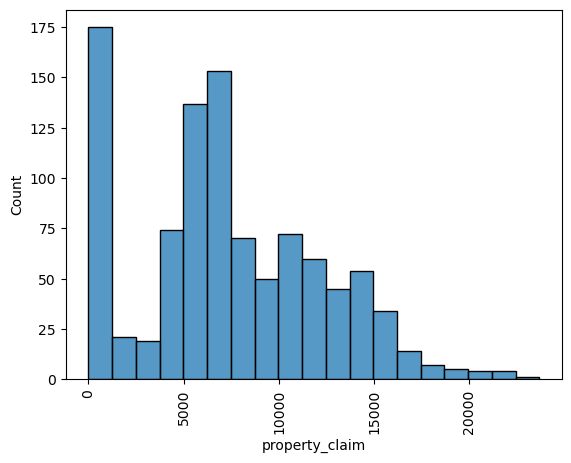

In [206]:
sns.histplot(df['property_claim'])
print(df['property_claim'].value_counts(),'\n')
print(df['property_claim'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above we see that property_claim is between 5000-8000

5040     7
3360     6
3600     5
4720     5
33600    5
        ..
43360    1
25130    1
38940    1
47430    1
52500    1
Name: vehicle_claim, Length: 725, dtype: int64 

5040     0.700701
3360     0.600601
3600     0.500501
4720     0.500501
33600    0.500501
           ...   
43360    0.100100
25130    0.100100
38940    0.100100
47430    0.100100
52500    0.100100
Name: vehicle_claim, Length: 725, dtype: float64


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000'),
  Text(80000.0, 0, '80000'),
  Text(90000.0, 0, '90000')])

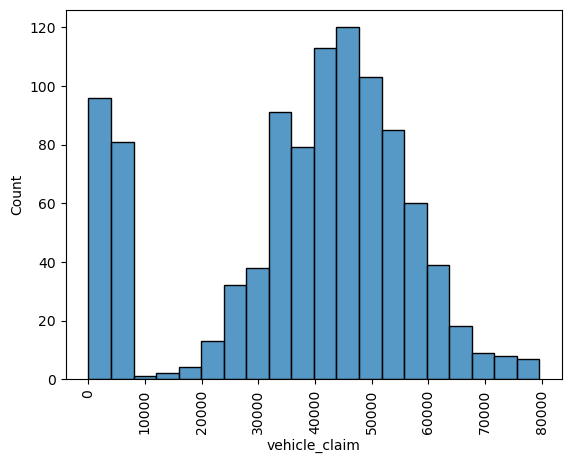

In [207]:
sns.histplot(df['vehicle_claim'])
print(df['vehicle_claim'].value_counts(),'\n')
print(df['vehicle_claim'].value_counts(normalize=True)*100)
plt.xticks(rotation=90)

From the above graph we see that vehicle_claim is reported in between 3500 to 5500

BiVarient Analysis

<Axes: xlabel='fraud_reported', ylabel='total_claim_amount'>

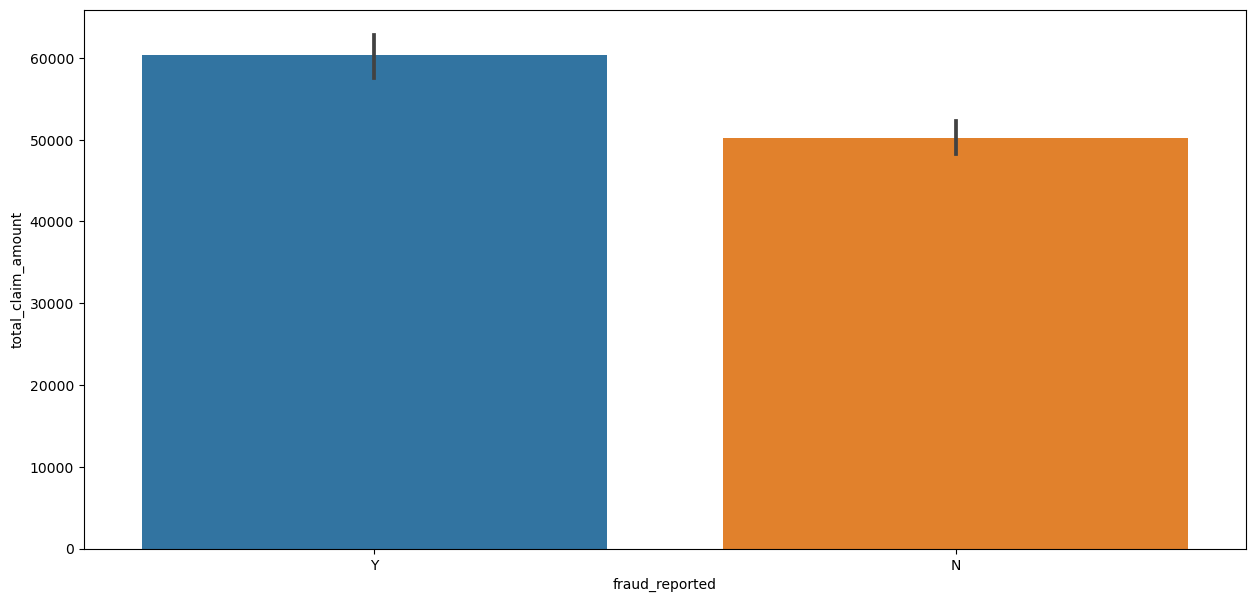

In [208]:
plt.figure(figsize=(15,7))
sns.barplot(y='total_claim_amount',x='fraud_reported',data=df)

From the above plot we observe that most of fraud reported where total claimed amount 50000 to 70000

<Axes: xlabel='number_of_vehicles_involved', ylabel='count'>

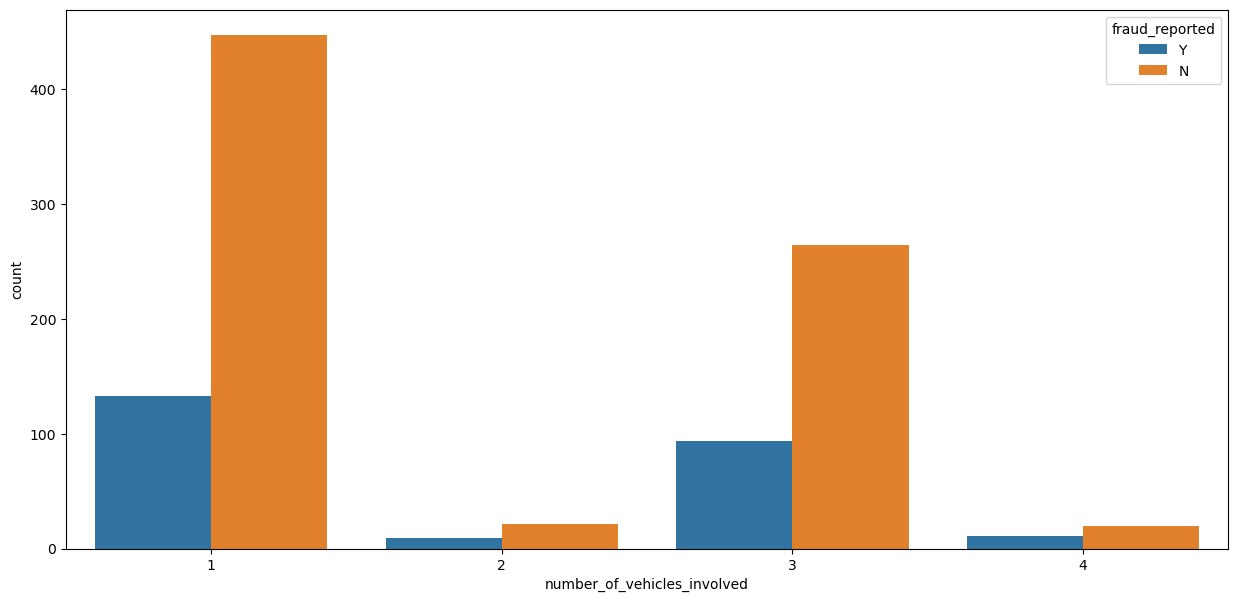

In [209]:
plt.figure(figsize=(15,7))
sns.countplot(x='number_of_vehicles_involved',hue='fraud_reported',data=df)

From the above plot we observe that most of the fraud report were found where number_of_vehicles_involved were more than 1

<Axes: xlabel='incident_city', ylabel='count'>

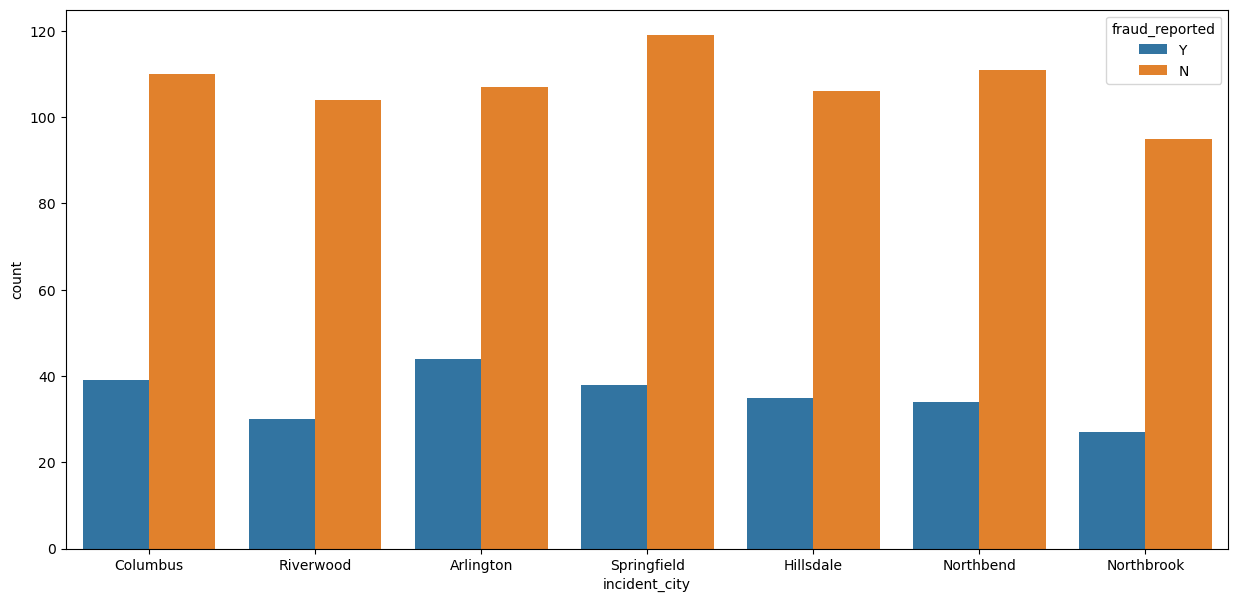

In [210]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_city',hue='fraud_reported',data=df)

From the above plot we see that in all cities fraud reported are almost same

<Axes: xlabel='incident_state', ylabel='count'>

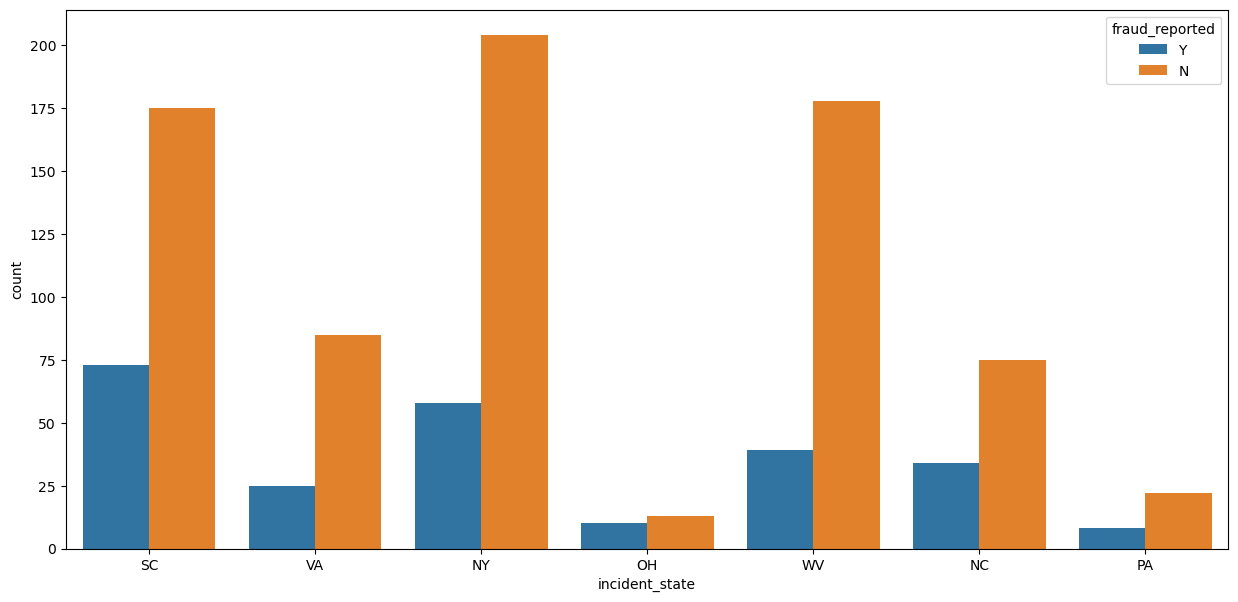

In [211]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_state',hue='fraud_reported',data=df)

From the above plot we see that most of the fraud reported were in SC, NY, OH, NC and PA

<Axes: xlabel='authorities_contacted', ylabel='count'>

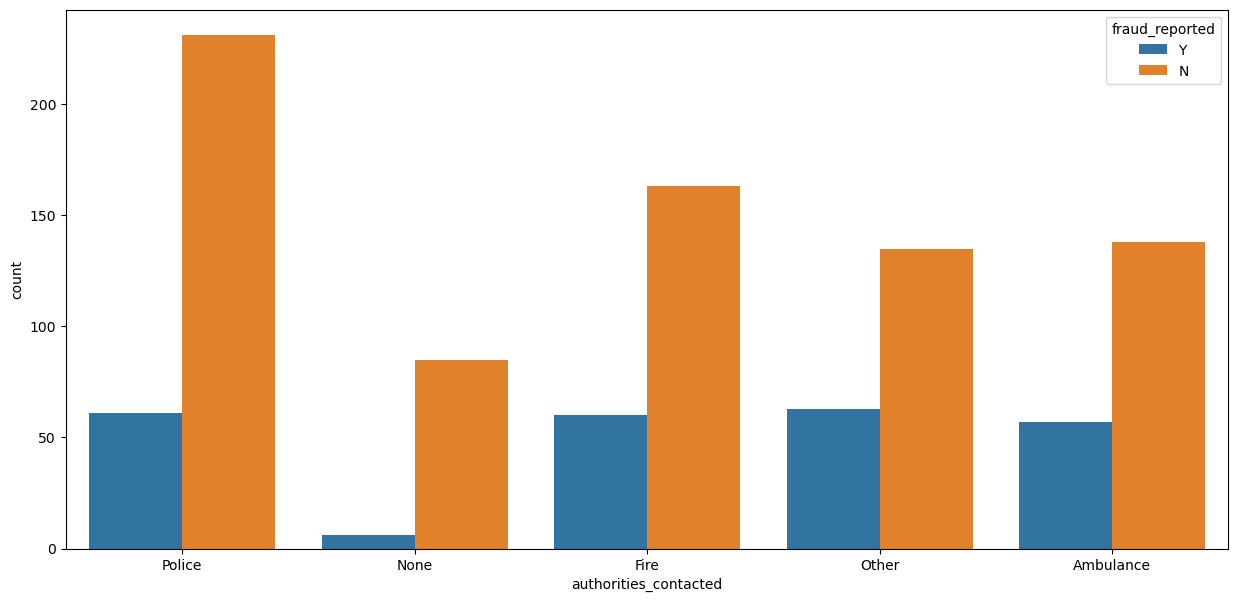

In [212]:
plt.figure(figsize=(15,7))
sns.countplot(x='authorities_contacted',hue='fraud_reported',data=df)

From the above plot we see that most of the fraud found have contacted authorities of Fire, Other and Ambulance

<Axes: xlabel='fraud_reported', ylabel='umbrella_limit'>

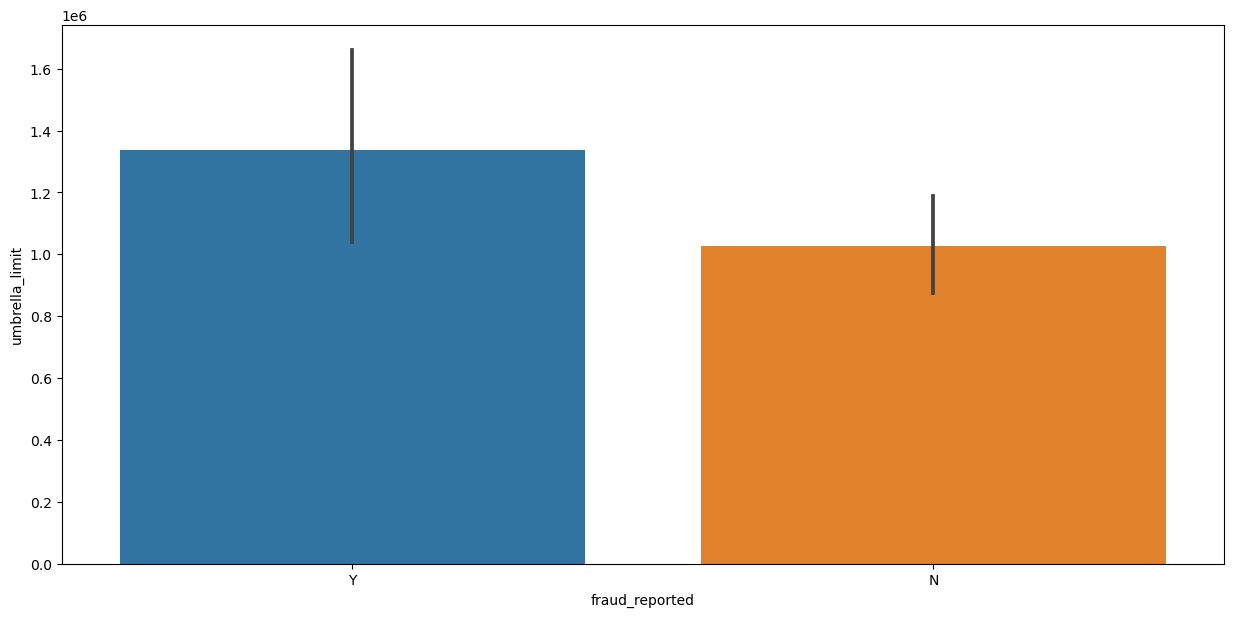

In [213]:
plt.figure(figsize=(15,7))
sns.barplot(x='fraud_reported',y='umbrella_limit',data=df)

From the above we see that most of fraud reported have their umbrella limit 0

<Axes: xlabel='incident_severity', ylabel='count'>

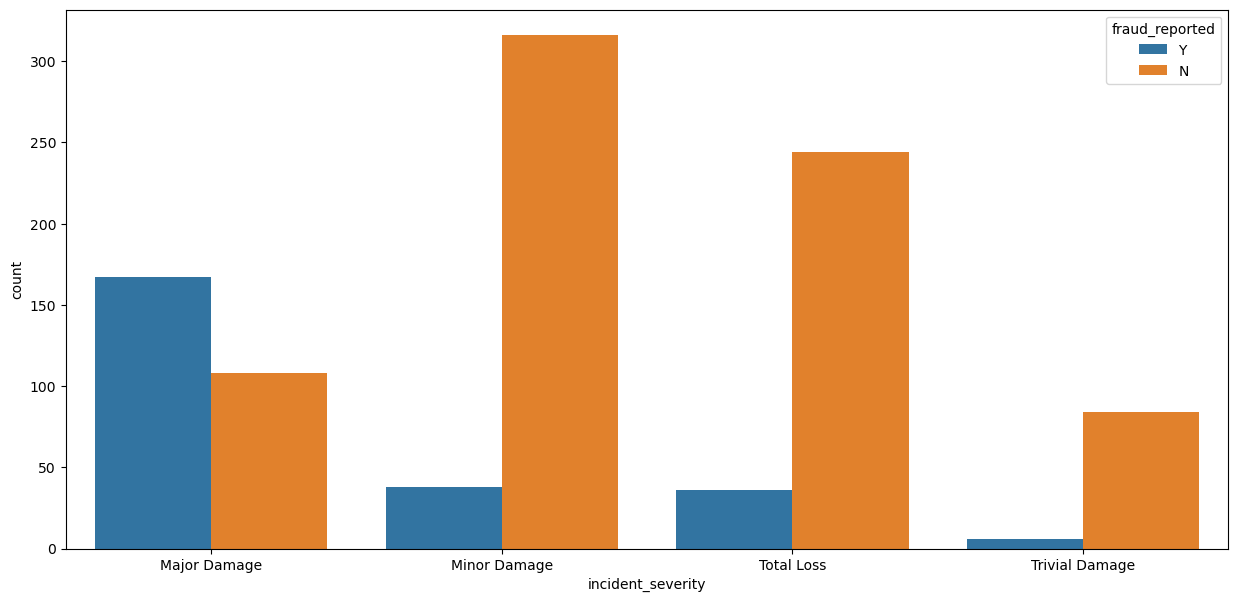

In [214]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_severity',hue='fraud_reported',data=df)

From the above graph we observe that most of fraud reported claim are Major Damage ,most of them are counted as fraud

<Axes: xlabel='collision_type', ylabel='count'>

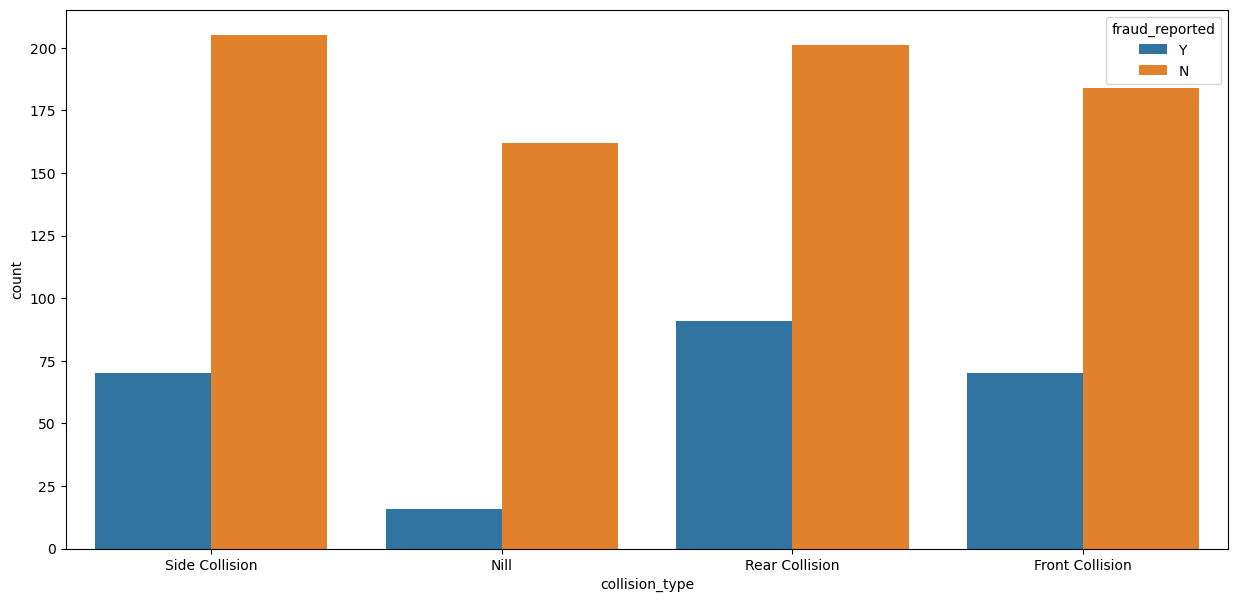

In [215]:
plt.figure(figsize=(15,7))
sns.countplot(x='collision_type',hue='fraud_reported',data=df)

From the above we see that most of fraud reported claims in Side Collision, Rear Collision and Front Collision.

<Axes: xlabel='incident_type', ylabel='count'>

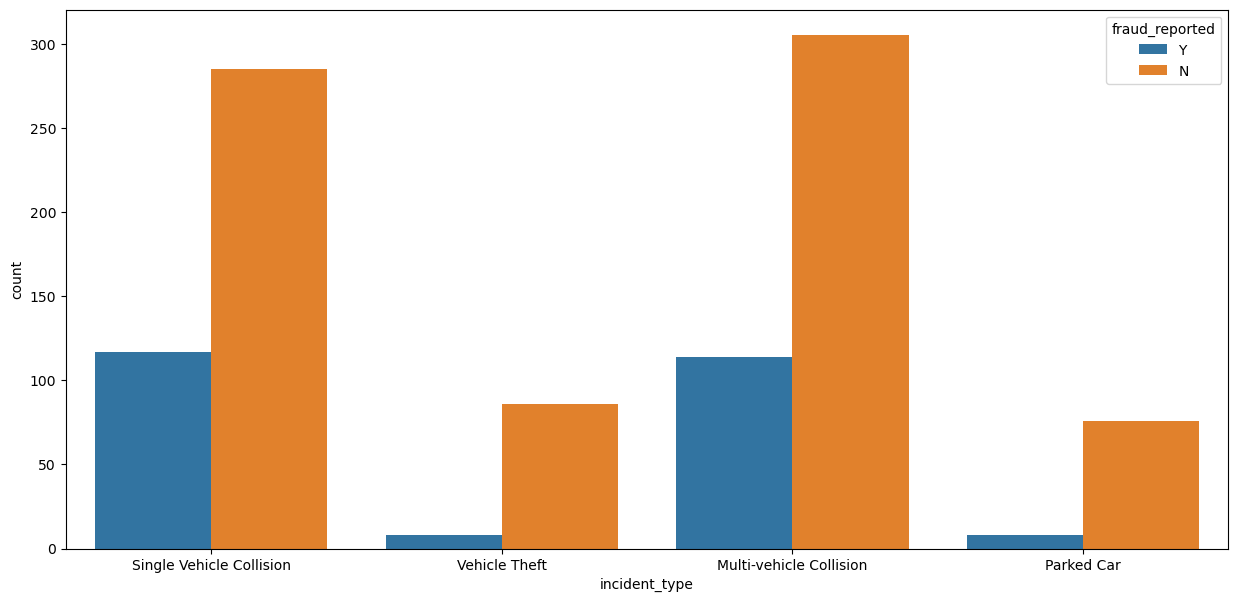

In [216]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_type',hue='fraud_reported',data=df)

From the above plot we see that most claim reported and fraud reported in Single vehicle collision and multi-vehicle collision incident type

<Axes: xlabel='incident_Month', ylabel='count'>

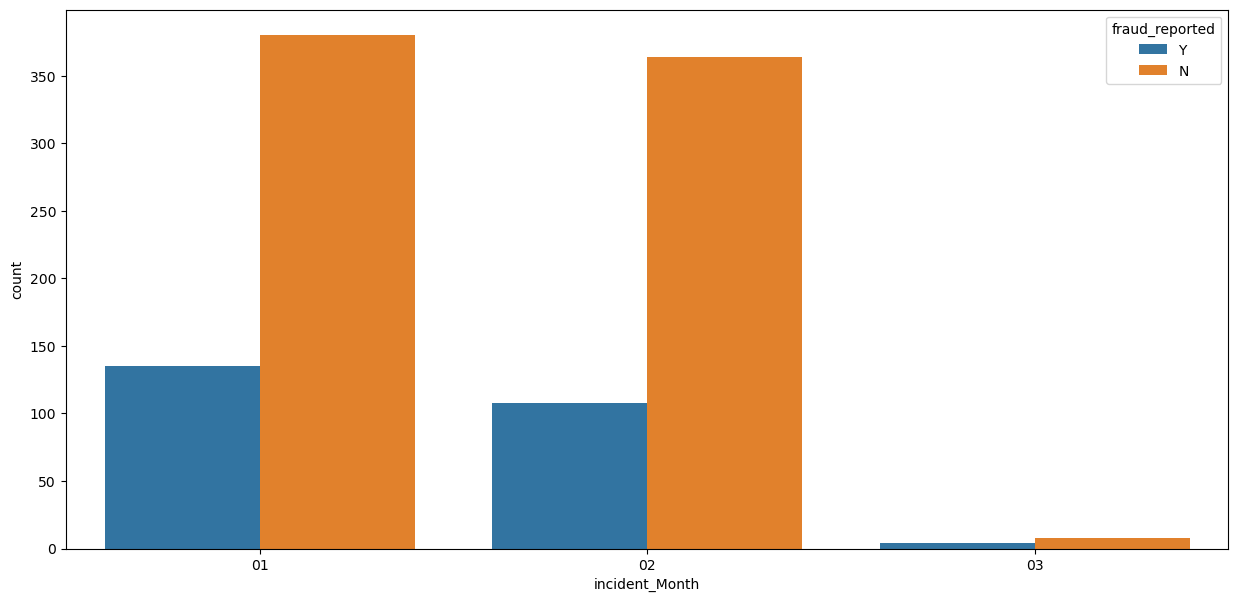

In [217]:
plt.figure(figsize=(15,7))
sns.countplot(x='incident_Month',hue='fraud_reported',data=df)

From the above we see that most of the fraud reported are in month 1 and 2 

<Axes: xlabel='fraud_reported', ylabel='capital-loss'>

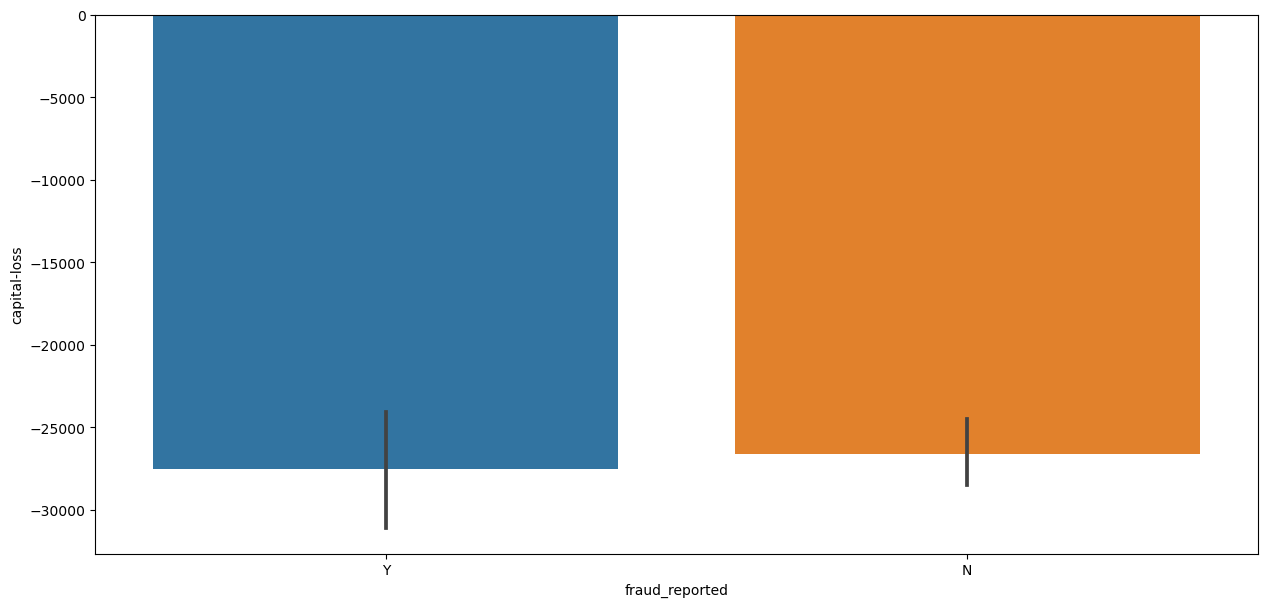

In [218]:
plt.figure(figsize=(15,7))
sns.barplot(y='capital-loss',x='fraud_reported',data=df)

From the above plot we see that most of fraud reported were in those capital loss which is -40000 to -60000

<Axes: xlabel='fraud_reported', ylabel='capital-gains'>

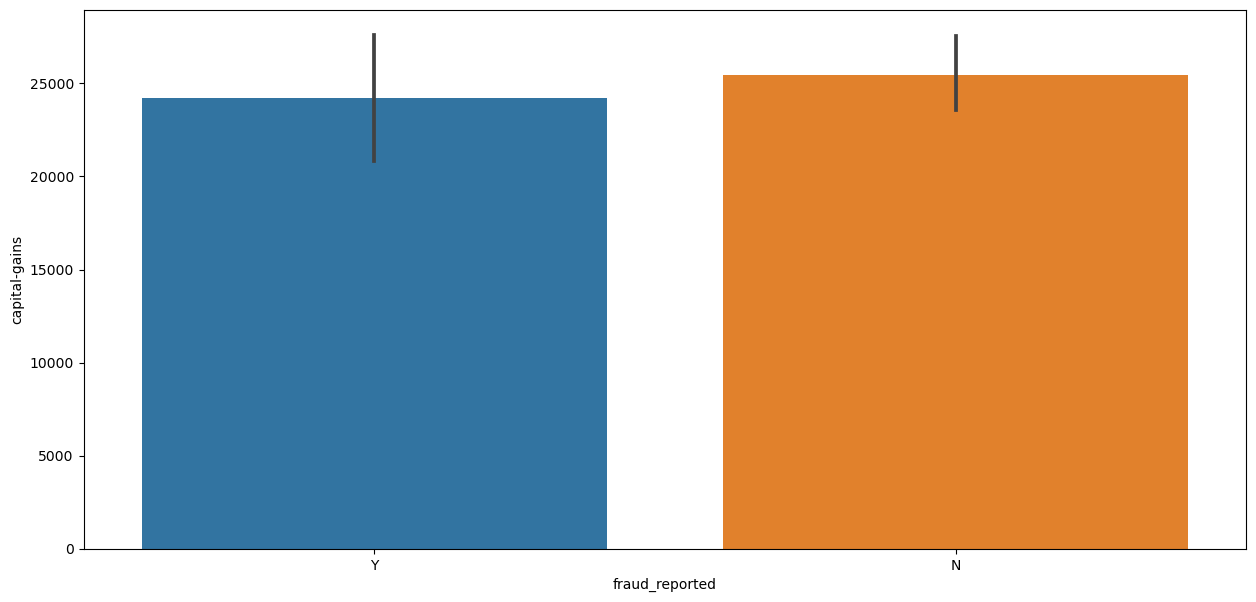

In [219]:
plt.figure(figsize=(15,7))
sns.barplot(y='capital-gains',x='fraud_reported',data=df)

From the above plot we see that most of the fraud reported are those capital gains which are around 0 and 50000


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

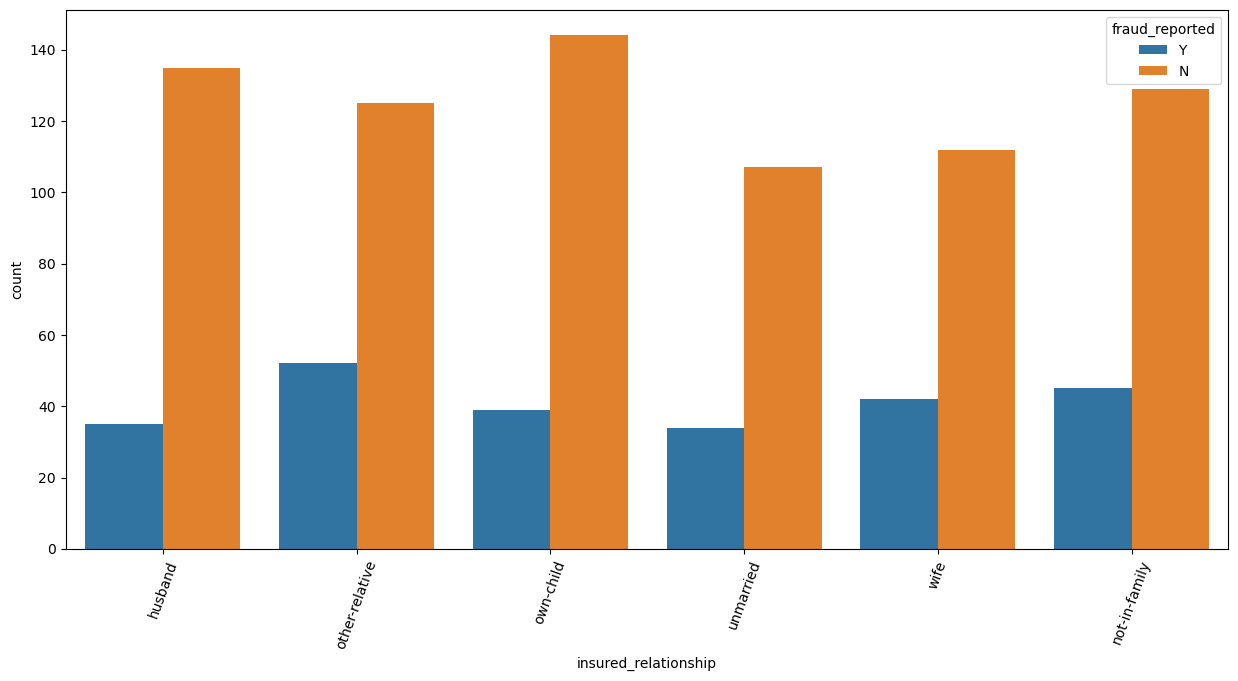

In [220]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_relationship',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

From the above plot we see that those having insured relationship with other relative and wife are most reported than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

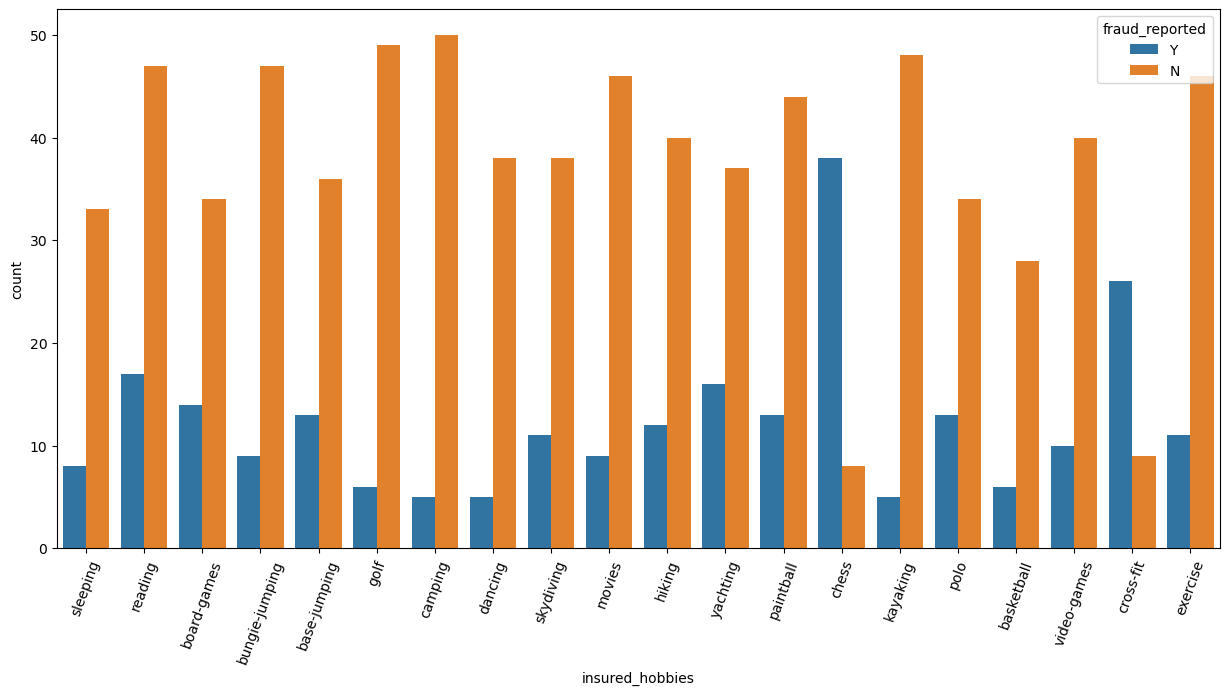

In [221]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)
plt.xticks(rotation=70)

From the above we observe that those hobbies are reading,board-games,base-jumping,yetching,piantball,cross-fit are most fraud reported than others

<Axes: xlabel='fraud_reported', ylabel='vehicle_claim'>

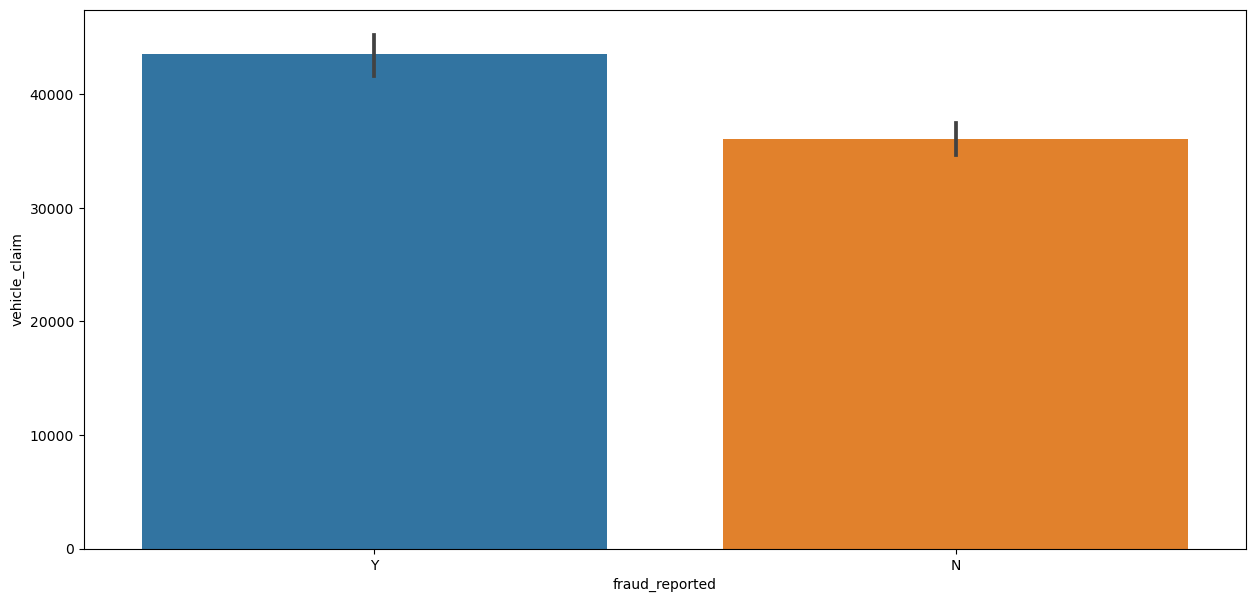

In [222]:
plt.figure(figsize=(15,7))
sns.barplot(y='vehicle_claim',x='fraud_reported',data=df)

From the above we see that fraud report is higher in between 3500 to 5500 vehicle_claim

<Axes: xlabel='fraud_reported', ylabel='property_claim'>

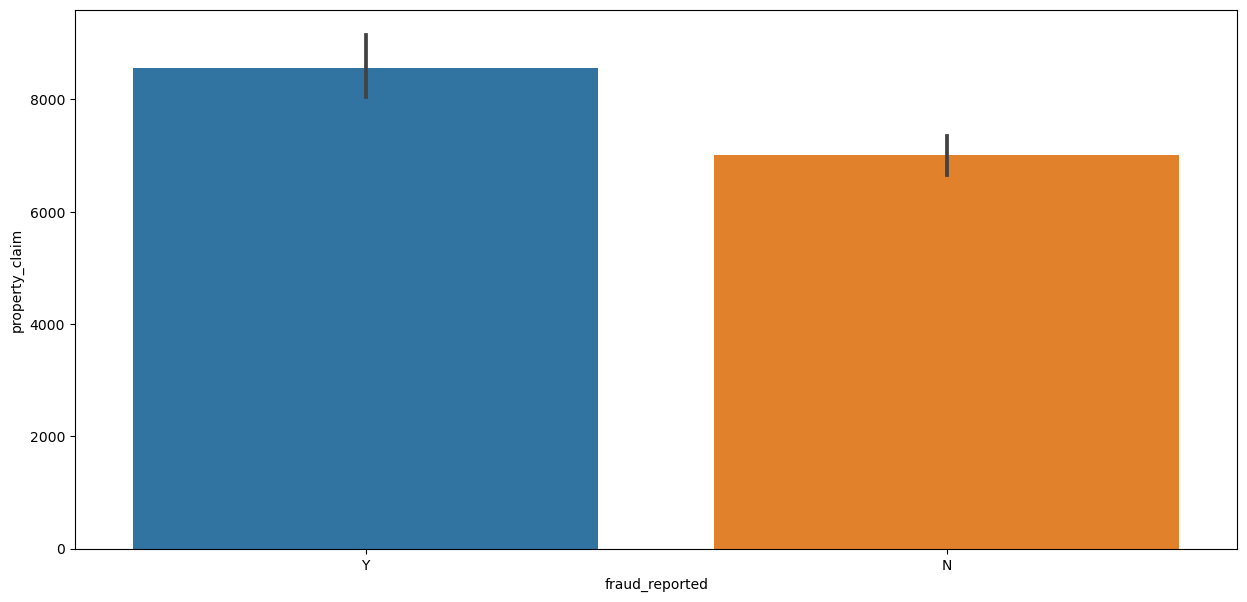

In [223]:
plt.figure(figsize=(15,7))
sns.barplot(y='property_claim',x='fraud_reported',data=df)

From the above we see that in Property claim fraud reported is higher of 5000 to 8000

<Axes: xlabel='fraud_reported', ylabel='injury_claim'>

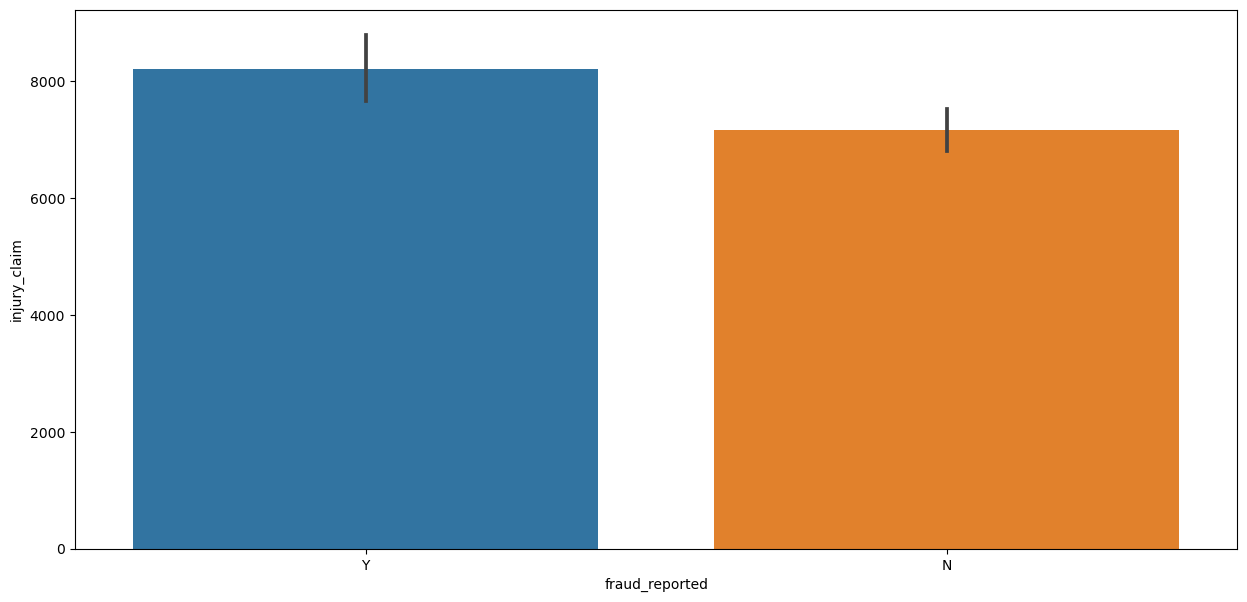

In [224]:
plt.figure(figsize=(15,7))
sns.barplot(y='injury_claim',x='fraud_reported',data=df)

From the above we see that most fraud reported are between 5000 to 8000 injury claim

<Axes: xlabel='insured_education_level', ylabel='count'>

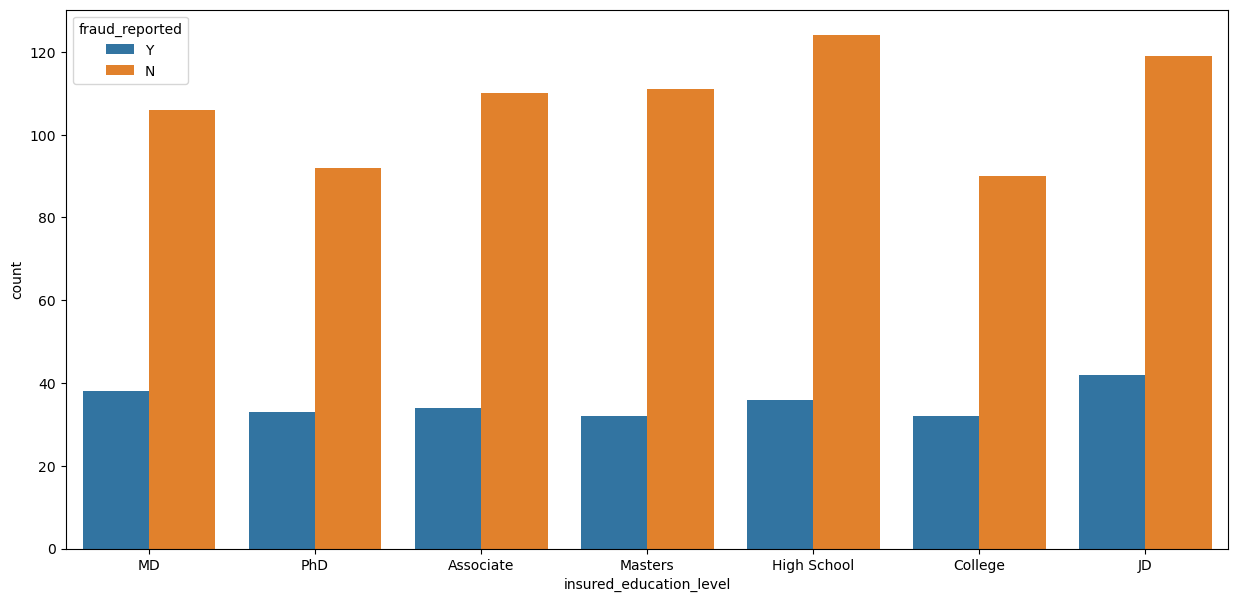

In [225]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_education_level', hue='fraud_reported',data=df)

From the above we see that those are at education level i.e High School fraud  reported is more and least in PhD and College
Fraud report is little higher in those education level JD,i.e MD, PhD, and College than others.

<Axes: xlabel='insured_sex', ylabel='count'>

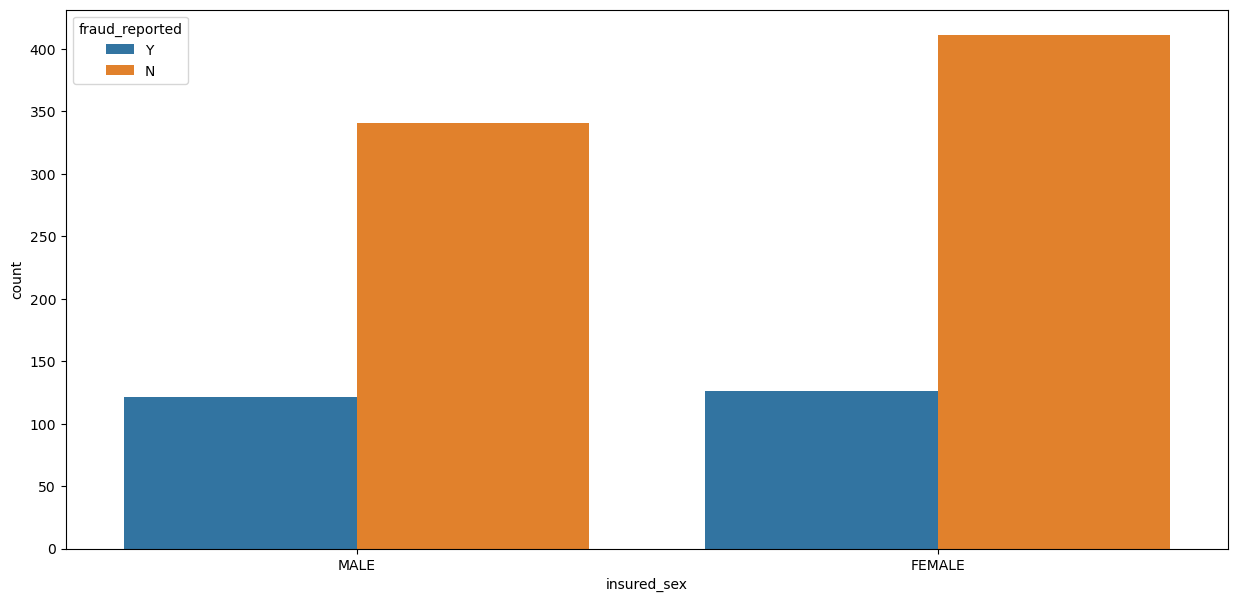

In [226]:
plt.figure(figsize=(15,7))
sns.countplot(x='insured_sex', hue='fraud_reported', data=df)

From the above we see that fraud reported is little high in Male 

<Axes: xlabel='fraud_reported', ylabel='policy_annual_premium'>

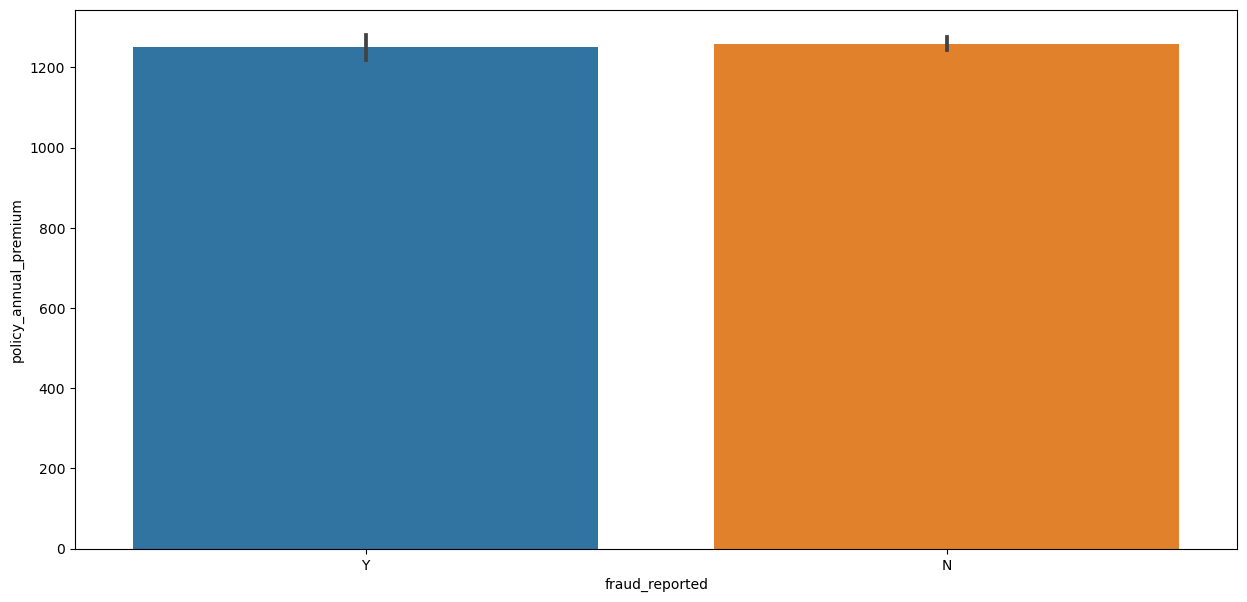

In [227]:
plt.figure(figsize=(15,7))
sns.barplot(x='fraud_reported',y='policy_annual_premium',data=df)

From the above we see that most of the fraud reported are found in those premium around 1250 to 1300

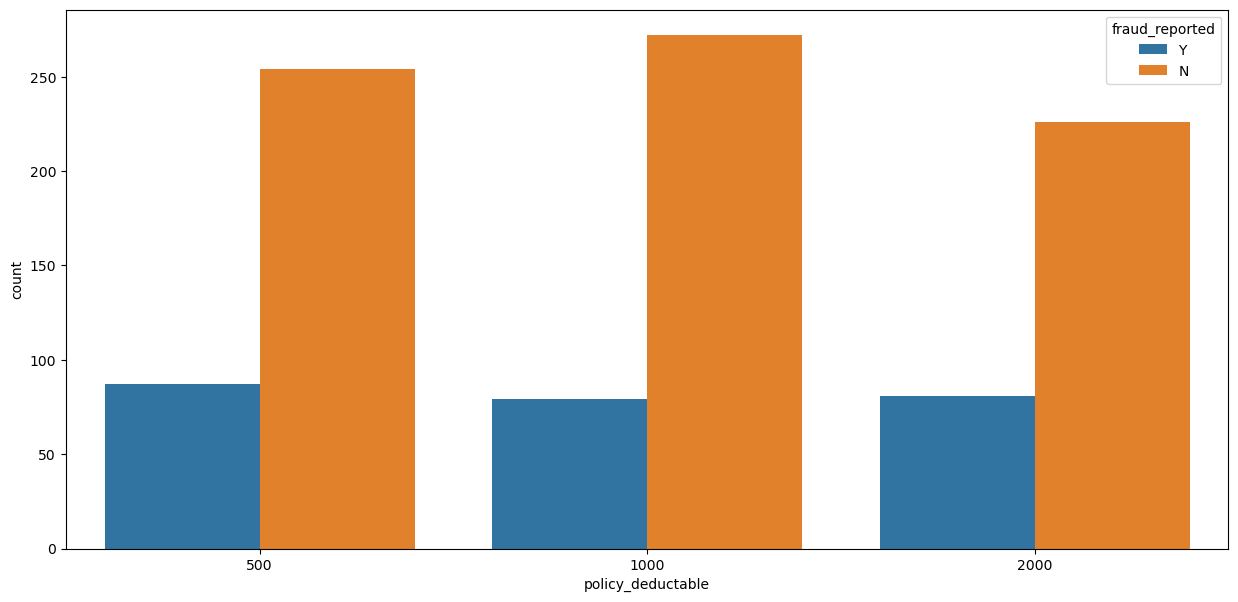

In [228]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='policy_deductable',hue='fraud_reported',data=df)

Here we notice that according to count fraud report is high of 2000 policy_deductable

<Axes: xlabel='policy_csl', ylabel='count'>

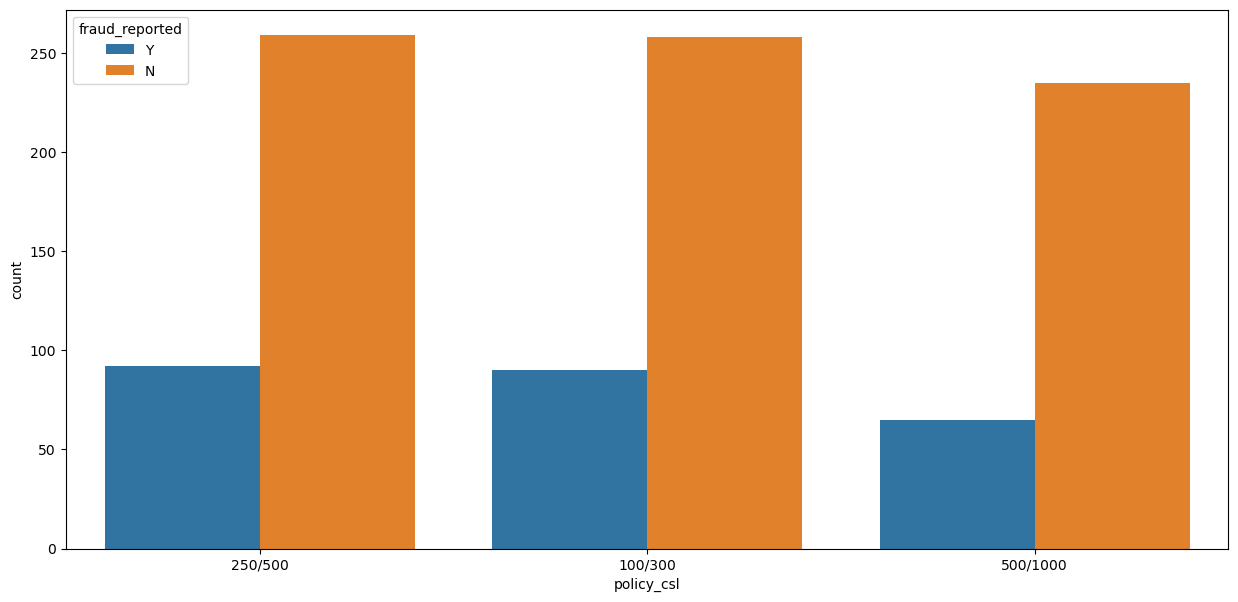

In [229]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_csl',hue='fraud_reported',data=df)

From the above we see that in all three csl we see same kind of similarity fraud report 

<Axes: xlabel='policy_state', ylabel='count'>

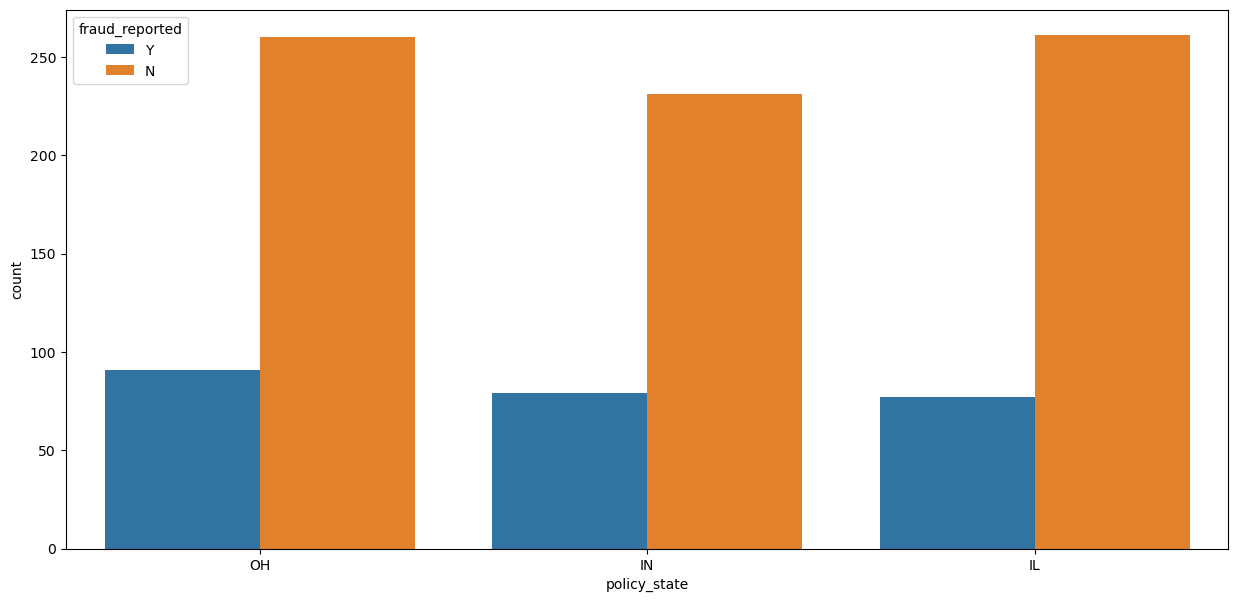

In [230]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_state',hue='fraud_reported',data=df)

From the above we see that from three stats fraud report is almost common in all

<Axes: xlabel='age', ylabel='count'>

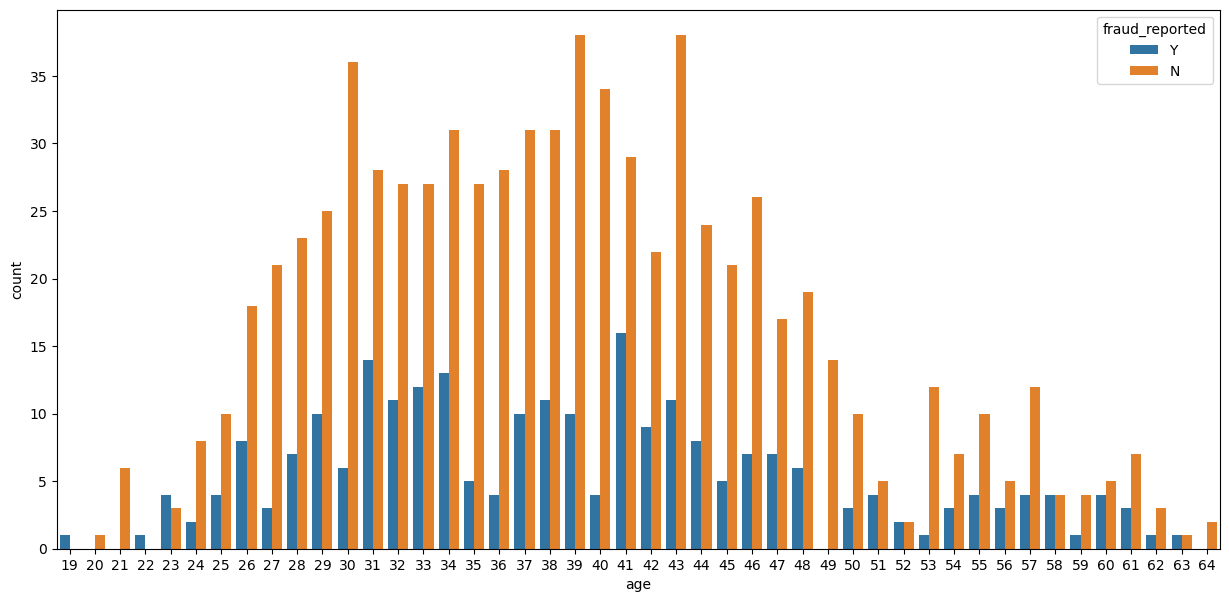

In [231]:
plt.figure(figsize=(15,7))
sns.countplot(x='age',hue='fraud_reported',data=df)

From the above we see that fraud reported is higher in 26 to 50 of age.

<Axes: xlabel='fraud_reported', ylabel='months_as_customer'>

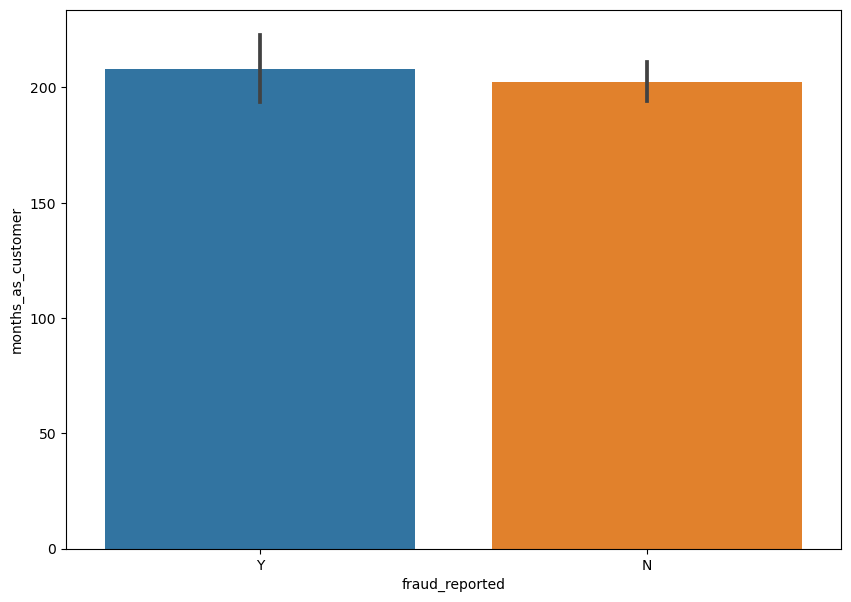

In [232]:
plt.figure(figsize=(10,7))
sns.barplot(y='months_as_customer',x='fraud_reported',data=df)

From the above we see that fraud report is high in between 100 to 250 months old

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, '2014'),
  Text(1, 0, '2006'),
  Text(2, 0, '2000'),
  Text(3, 0, '1990'),
  Text(4, 0, '1997'),
  Text(5, 0, '2011'),
  Text(6, 0, '2002'),
  Text(7, 0, '1999'),
  Text(8, 0, '2012'),
  Text(9, 0, '1998'),
  Text(10, 0, '1992'),
  Text(11, 0, '2005'),
  Text(12, 0, '2004'),
  Text(13, 0, '1994'),
  Text(14, 0, '1991'),
  Text(15, 0, '1996'),
  Text(16, 0, '2013'),
  Text(17, 0, '2008'),
  Text(18, 0, '2003'),
  Text(19, 0, '2010'),
  Text(20, 0, '1993'),
  Text(21, 0, '1995'),
  Text(22, 0, '2007'),
  Text(23, 0, '2001'),
  Text(24, 0, '2009'),
  Text(25, 0, '2015')])

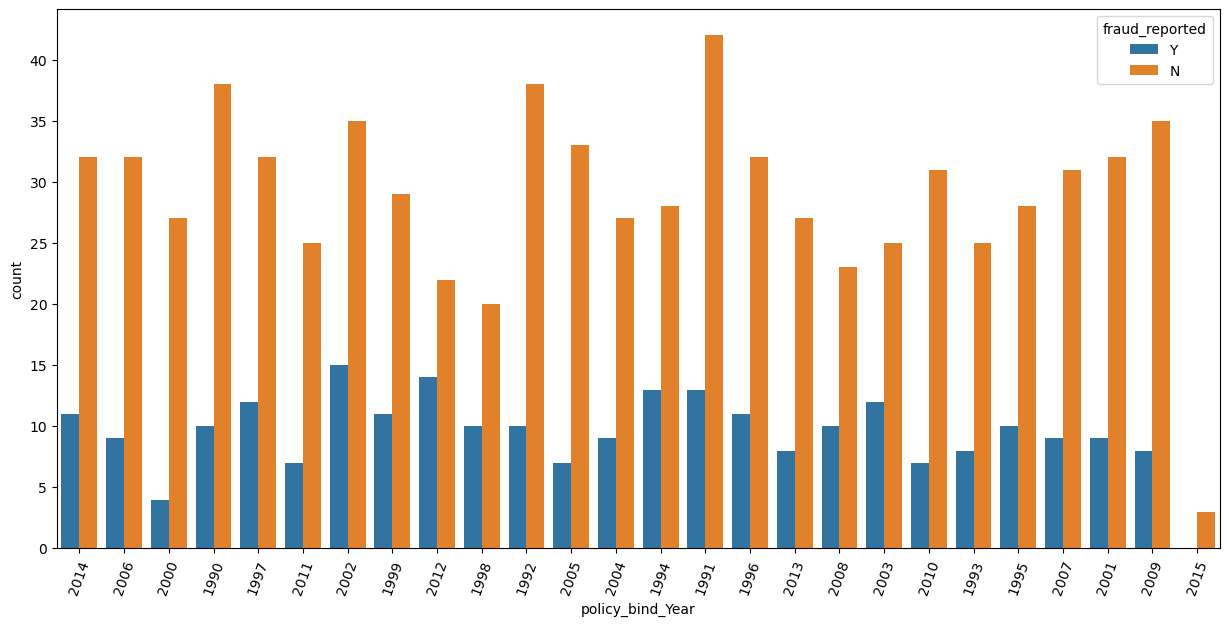

In [233]:
plt.figure(figsize=(15,7))
sns.countplot(x='policy_bind_Year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

Here we notice fraud report is high in policy_bind_Year of 2014, 2006, 1990, 1997, 2002, 1999, 2012, 1998, 1994, 2008, 2003 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, '1995'),
  Text(1, 0, '1996'),
  Text(2, 0, '1997'),
  Text(3, 0, '1998'),
  Text(4, 0, '1999'),
  Text(5, 0, '2000'),
  Text(6, 0, '2001'),
  Text(7, 0, '2002'),
  Text(8, 0, '2003'),
  Text(9, 0, '2004'),
  Text(10, 0, '2005'),
  Text(11, 0, '2006'),
  Text(12, 0, '2007'),
  Text(13, 0, '2008'),
  Text(14, 0, '2009'),
  Text(15, 0, '2010'),
  Text(16, 0, '2011'),
  Text(17, 0, '2012'),
  Text(18, 0, '2013'),
  Text(19, 0, '2014'),
  Text(20, 0, '2015')])

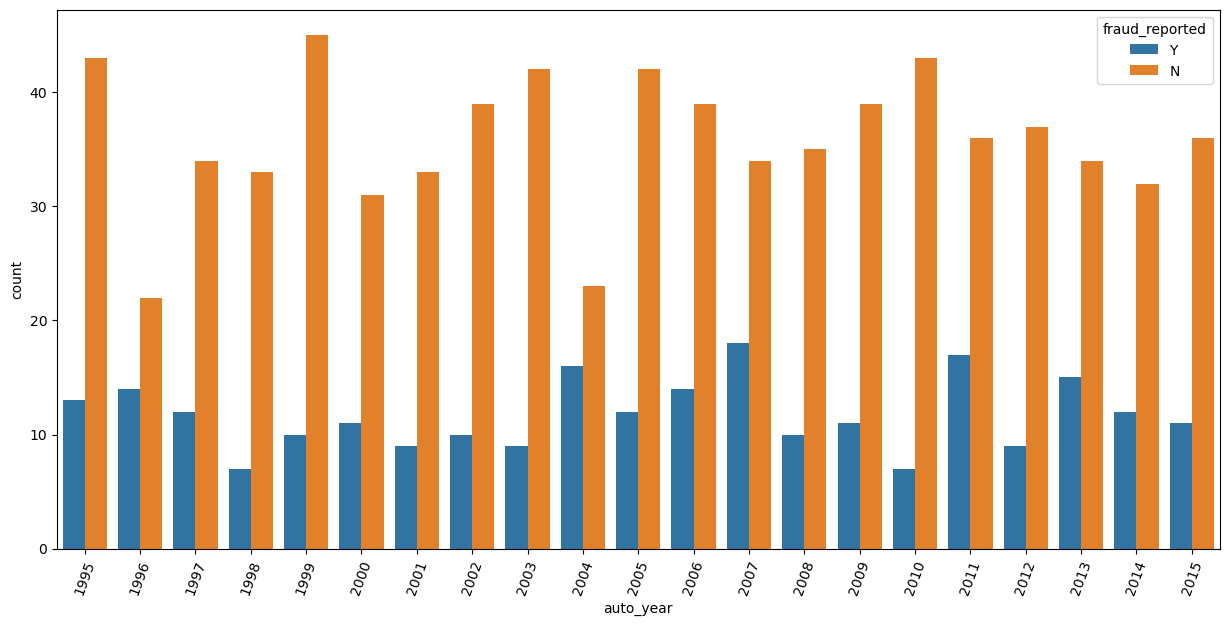

In [234]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_year',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

From the above we see that vehicle count fraud reported is higher in vehicle of 1996, 2004, 2007, 2011, 2013, 2014 and etc than others

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '92x'),
  Text(1, 0, 'E400'),
  Text(2, 0, 'RAM'),
  Text(3, 0, 'Tahoe'),
  Text(4, 0, 'RSX'),
  Text(5, 0, '95'),
  Text(6, 0, 'Pathfinder'),
  Text(7, 0, 'A5'),
  Text(8, 0, 'Camry'),
  Text(9, 0, 'F150'),
  Text(10, 0, 'A3'),
  Text(11, 0, 'Highlander'),
  Text(12, 0, 'Neon'),
  Text(13, 0, 'MDX'),
  Text(14, 0, 'Maxima'),
  Text(15, 0, 'Legacy'),
  Text(16, 0, 'TL'),
  Text(17, 0, 'Impreza'),
  Text(18, 0, 'Forrestor'),
  Text(19, 0, 'Escape'),
  Text(20, 0, 'Corolla'),
  Text(21, 0, '3 Series'),
  Text(22, 0, 'C300'),
  Text(23, 0, 'Wrangler'),
  Text(24, 0, 'M5'),
  Text(25, 0, 'X5'),
  Text(26, 0, 'Civic'),
  Text(27, 0, 'Passat'),
  Text(28, 0, 'Silverado'),
  Text(29, 0, 'CRV'),
  Text(30, 0, '93'),
  Text(31, 0, 'Accord'),
  Text(32, 0, 'X6'),
  Text(33, 0, 'Malibu'),
  Text(34, 0, 'F

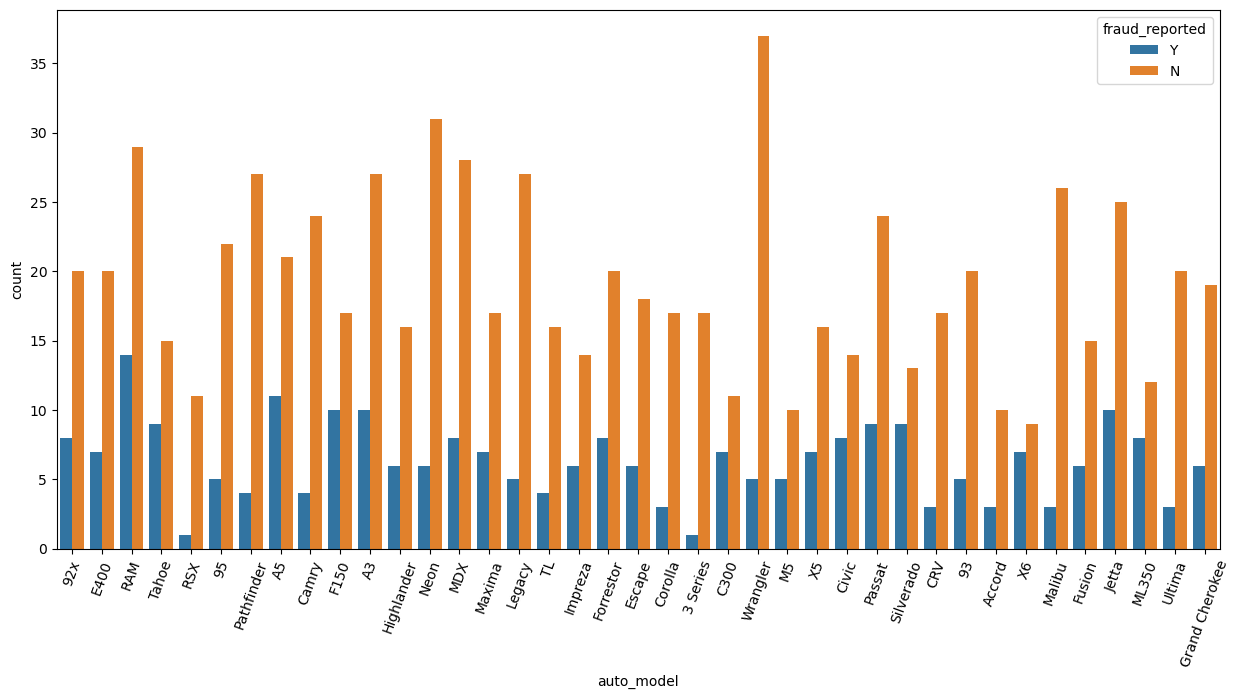

In [235]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_model',hue='fraud_reported',data=df)
plt.xticks(rotation =70,)

From the above we see that fraud report is higher in 92x, RAM, E400, Tahore, A5, F150, X5, C300, M5, CIVIC, SILVERADOX6 ML300 auto_models

<Axes: xlabel='auto_make', ylabel='count'>

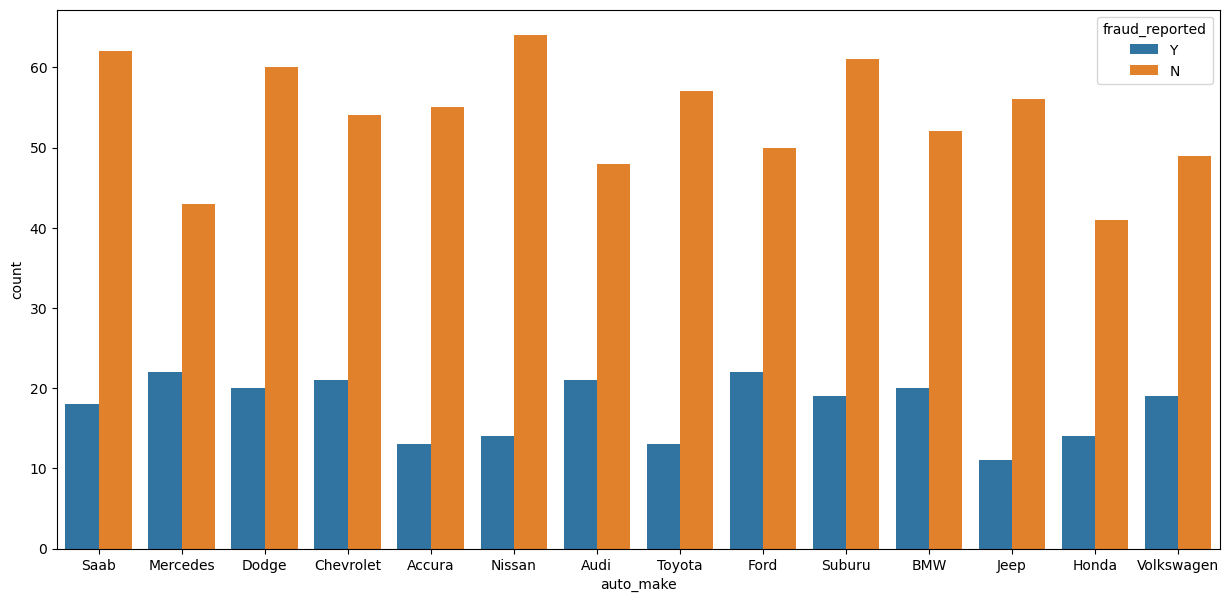

In [236]:
plt.figure(figsize=(15,7))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

From the above we see that fraud reported is higher in Saab, Merceded, Dodge, Chevrolet, Audi , Ford, Suburu BMW and volkswagen auto_make

MultiVarient Anaysis

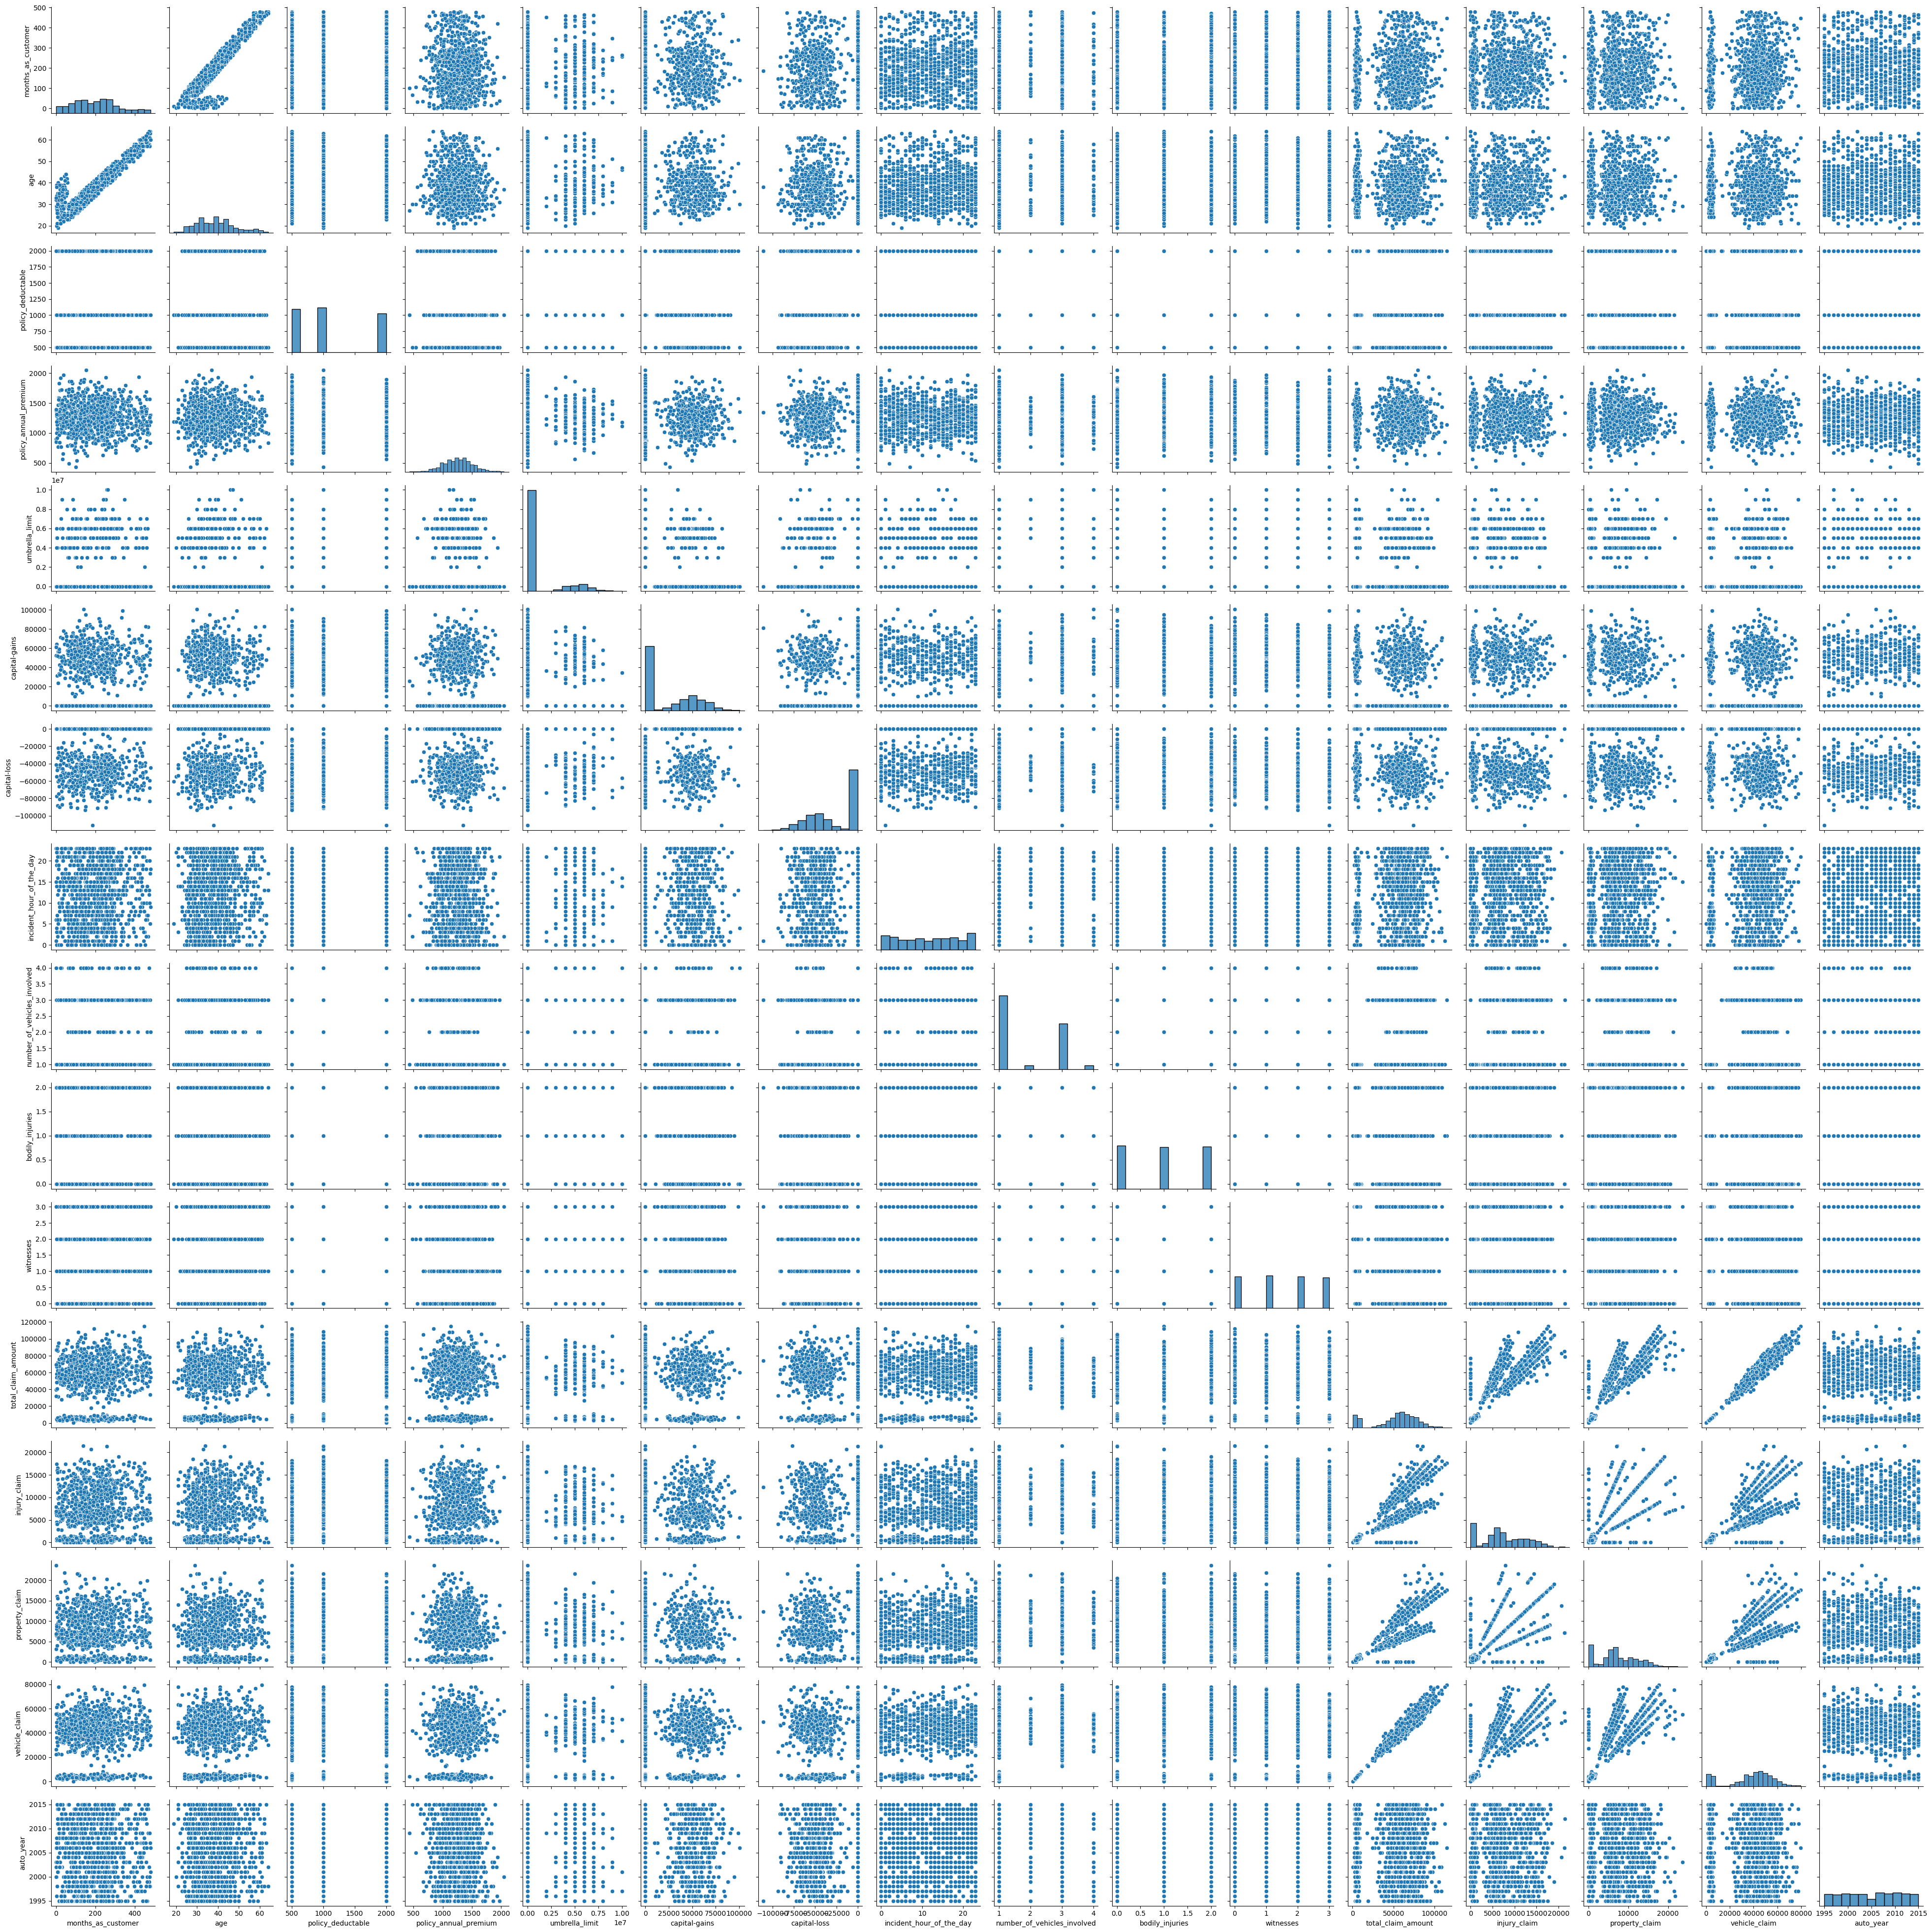

In [220]:
sns.pairplot(df)

In [237]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'incident_Date', 'incident_Month', 'policy_bind_Date', 'policy_bind_Month', 'policy_bind_Year']


In [238]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [239]:
df.skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.806100
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.595646
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
incident_Date                  0.040471
incident_Month                 0.265608
policy_bind_Date               0.051641
policy_bind_Month             -0.018242
policy_bind_Year               0.050574
dtype: float64

we can see here most of the columns are skewed will only deal with numerical columns umbrella_limit,total_claim_amount and vehicle_claim have skewness lets remove them

In [240]:
from sklearn.preprocessing import power_transform
df[['umbrella_limit','total_claim_amount','vehicle_calim']]=power_transform(df[['umbrella_limit','total_claim_amount','vehicle_claim']],method='yeo-johnson')

In [241]:
df.skew()

months_as_customer             0.364014
age                            0.479796
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.492893
capital-gains                  0.477220
capital-loss                  -0.389813
incident_hour_of_the_day      -0.034990
number_of_vehicles_involved    0.501009
bodily_injuries                0.012940
witnesses                      0.018399
total_claim_amount            -0.511002
injury_claim                   0.265382
property_claim                 0.378121
vehicle_claim                 -0.622627
auto_year                     -0.049502
incident_Date                  0.040471
incident_Month                 0.265608
policy_bind_Date               0.051641
policy_bind_Month             -0.018242
policy_bind_Year               0.050574
vehicle_calim                 -0.523647
dtype: float64

we see that we have successfully removed skewness from our columns

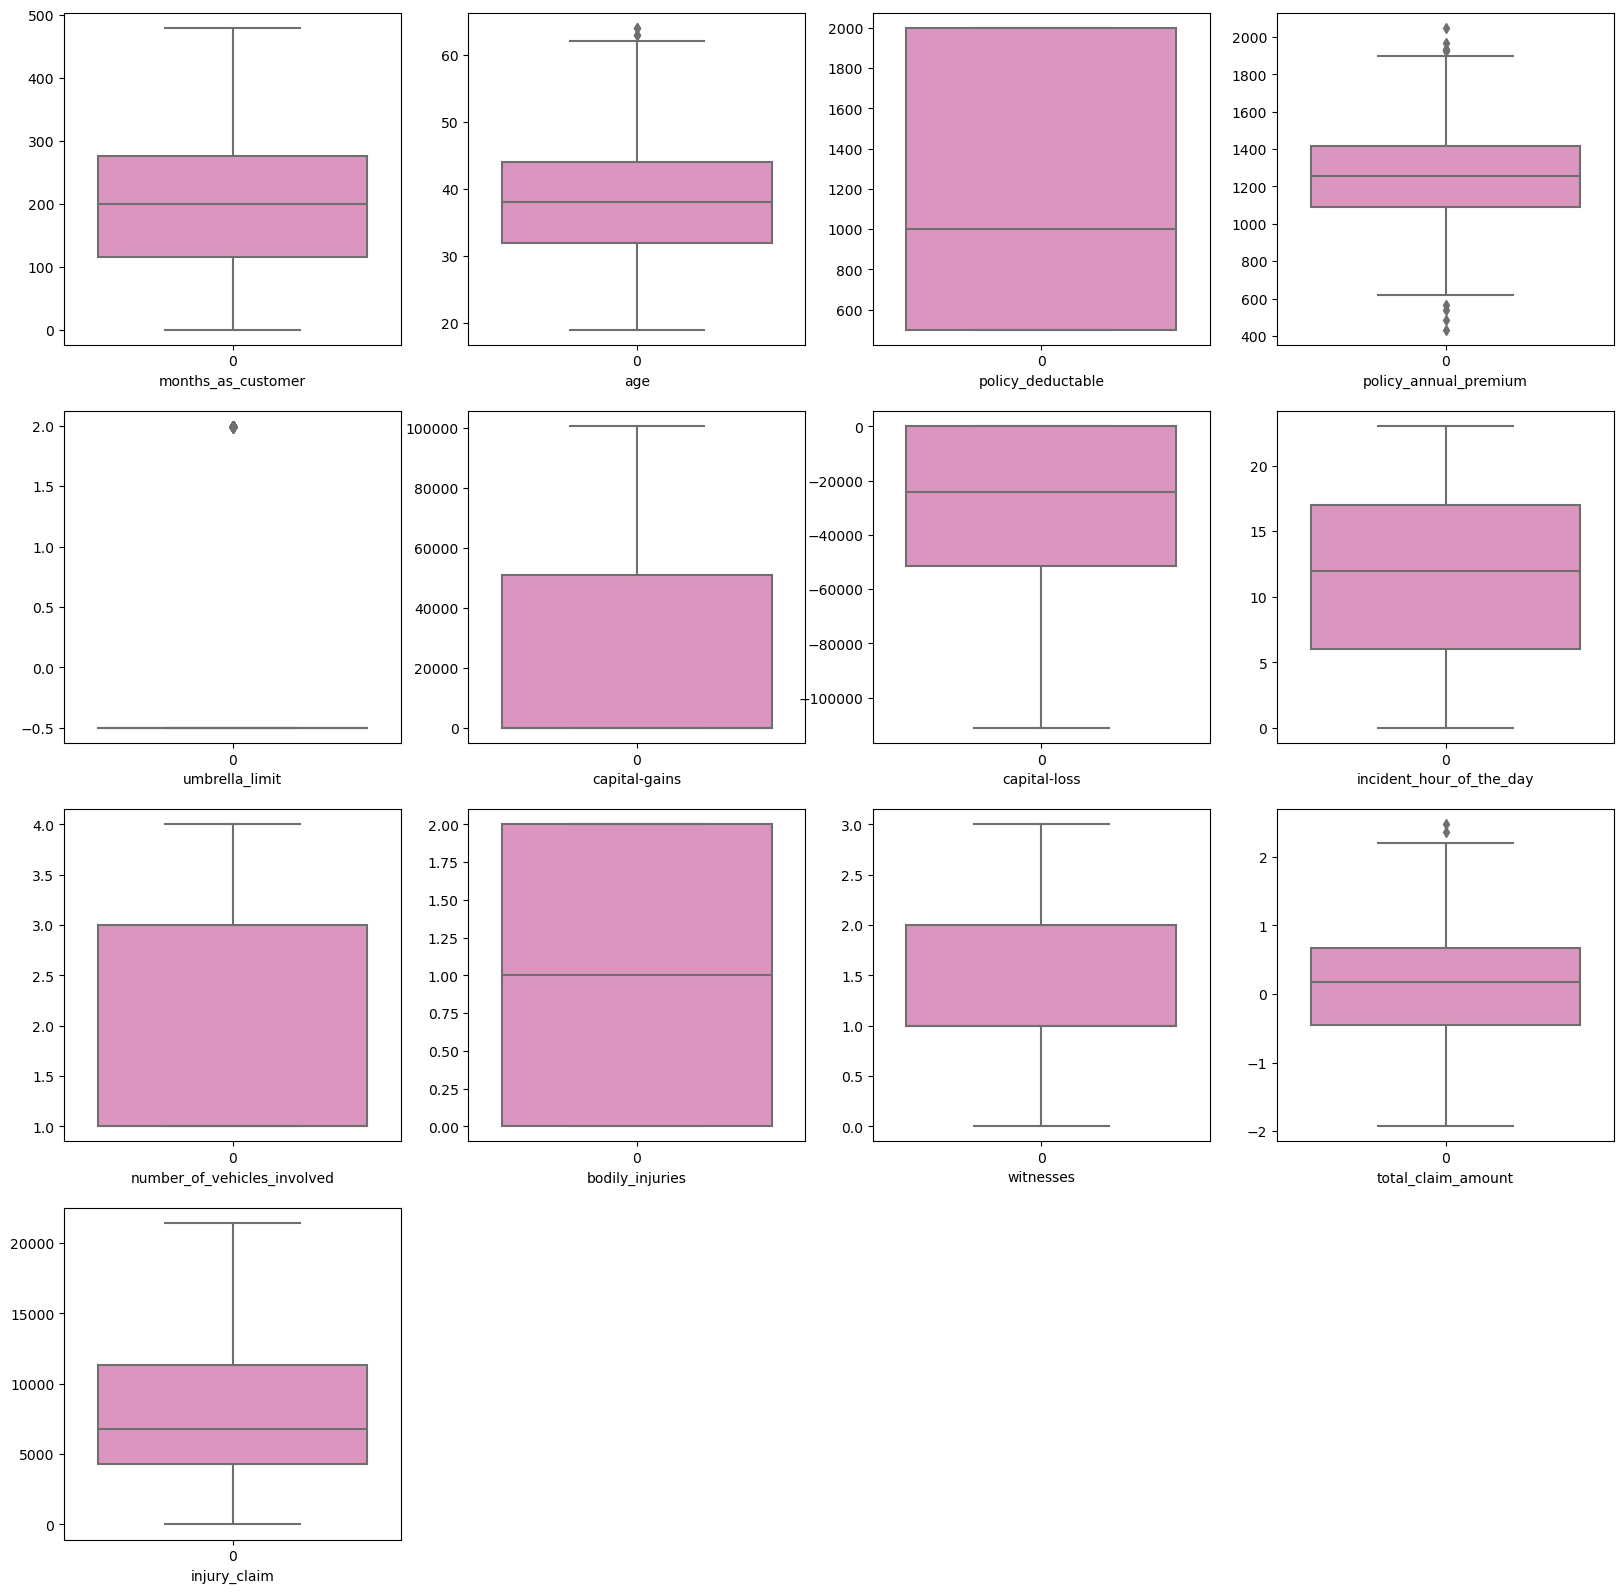

In [242]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette="Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

In [243]:
features = df[['age','total_claim_amount','umbrella_limit','policy_annual_premium']]
from scipy.stats import zscore
z=np.abs(zscore(features))
df = df[(z<3).all(axis=1)]
df

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   328   48           OH    250/500               1000   
1                   228   42           IN    250/500               2000   
2                   134   29           OH    100/300               2000   
3                   256   41           IL    250/500               2000   
4                   228   44           IL   500/1000               1000   
..                  ...  ...          ...        ...                ...   
995                   3   38           OH   500/1000               1000   
996                 285   41           IL    100/300               1000   
997                 130   34           OH    250/500                500   
998                 458   62           IL   500/1000               2000   
999                 456   60           OH    250/500               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1406.91       -0.501876        MALE   
1                  1197.22        1.992256        MALE   
2                  1413.14        1.992256      FEMALE   
3                  1415.74        1.993445      FEMALE   
4                  1583.91        1.993445        MALE   
..                     ...             ...         ...   
995                1310.80       -0.501876      FEMALE   
996                1436.79       -0.501876      FEMALE   
997                1383.49        1.988548      FEMALE   
998                1356.92        1.992256        MALE   
999                 766.19       -0.501876      FEMALE   

    insured_education_level insured_occupation  ...   auto_make auto_model  \
0                        MD       craft-repair  ...        Saab        92x   
1                        MD  machine-op-inspct  ...    Mercedes       E400   
2                       PhD              sales  ...       Dodge        RAM   
3                       PhD       armed-forces  ...   Chevrolet      Tahoe   
4                 Associate              sales  ...      Accura        RSX   
..                      ...                ...  ...         ...        ...   
995                 Masters       craft-repair  ...       Honda     Accord   
996                     PhD     prof-specialty  ...  Volkswagen     Passat   
997                 Masters       armed-forces  ...      Suburu    Impreza   
998               Associate  handlers-cleaners  ...        Audi         A5   
999               Associate              sales  ...    Mercedes       E400   

     auto_year  fraud_reported incident_Date incident_Month policy_bind_Date  \
0         2004               Y            25             01               17   
1         2007               Y            21             01               27   
2         2007               N            22             02               06   
3         2014               Y            10             01               25   
4         2009               N            17             02               06   
..         ...             ...           ...            ...              ...   
995       2006               N            22             02               16   
996       2015               N            24             01               05   
997       1996               N            23             01               17   
998       1998               N            26             02               18   
999       2007               N            26             02               11   

    policy_bind_Month policy_bind_Year vehicle_calim  
0                  10             2014      0.756106  
1                  06             2006     -1.786299  
2                  09             2000     -0.820213  
3                  05             1990      0.679910  
4                  06             2014     -1.739726  
..                ...              ...           ...  
995                07             1991      1.262302  
996                01             2014      1.908849  
997           

In [244]:
df.shape

(996, 41)

In [245]:
data_loss=(999-996)/999*100
data_loss

0.3003003003003003

In [246]:
categorical_col = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'incident_Date', 'incident_Month', 'policy_bind_Date', 'policy_bind_Month', 'policy_bind_Year']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df[categorical_col]=df[categorical_col].apply(LE.fit_transform)
df[categorical_col]

policy_state  policy_csl  insured_sex  insured_education_level  \
0               2           1            1                        4   
1               1           1            1                        4   
2               2           0            0                        6   
3               0           1            0                        6   
4               0           2            1                        0   
..            ...         ...          ...                      ...   
995             2           2            0                        5   
996             0           0            0                        6   
997             2           1            0                        5   
998             0           2            1                        0   
999             2           1            0                        0   

     insured_occupation  insured_hobbies  insured_relationship  incident_date  \
0                     2               17                     0             49   
1                     6               15                     2             41   
2                    11                2                     3             44   
3                     1                2                     4             19   
4                    11                2                     4             34   
..                  ...              ...                   ...            ...   
995                   2               13                     4             44   
996                   9               17                     5             47   
997                   1                3                     2             45   
998                   5                0                     5             52   
999                  11               11                     0             52   

     incident_type  collision_type  ...  property_damage  \
0                2               3  ...                2   
1                3               1  ...                1   
2                0               2  ...                0   
3                2               0  ...                1   
4                3               1  ...                0   
..             ...             ...  ...              ...   
995              2               0  ...                2   
996              2               2  ...                2   
997              0               3  ...                1   
998              2               2  ...                1   
999              1               1  ...                1   

     police_report_available  auto_make  auto_model  fraud_reported  \
0                          2         10           1               1   
1                          1          8          12               1   
2                          0          4          30               0   
3                          0          3          34               1   
4                          0          0          31               0   
..                       ...        ...         ...             ...   
995                        1          6           6               0   
996                        1         13          28               0   
997                        2         11          19               0   
998                        2          1           5               0   
999                        1          8          12               0   

     incident_Date  incident_Month  policy_bind_Date  policy_bind_Month  \
0               24               0                16                  9   
1               20               0                26                  5   
2               21               1                 5                  8   
3                9               0                24                  4   
4               16               1                 5                  5   
..             ...             ...               ...                ...   
995             21               1                15                  6   
996  

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           996 non-null    int64  
 1   age                          996 non-null    int64  
 2   policy_state                 996 non-null    int32  
 3   policy_csl                   996 non-null    int32  
 4   policy_deductable            996 non-null    int64  
 5   policy_annual_premium        996 non-null    float64
 6   umbrella_limit               996 non-null    float64
 7   insured_sex                  996 non-null    int32  
 8   insured_education_level      996 non-null    int32  
 9   insured_occupation           996 non-null    int32  
 10  insured_hobbies              996 non-null    int32  
 11  insured_relationship         996 non-null    int32  
 12  capital-gains                996 non-null    int64  
 13  capital-loss        

In [248]:
cor=df.corr()
cor

months_as_customer       age  policy_state  \
months_as_customer                     1.000000  0.922074     -0.002809   
age                                    0.922074  1.000000     -0.016867   
policy_state                          -0.002809 -0.016867      1.000000   
policy_csl                            -0.024424 -0.013458      0.002612   
policy_deductable                      0.026051  0.028245      0.010740   
policy_annual_premium                 -0.000635  0.007601      0.012060   
umbrella_limit                         0.002808 -0.002013     -0.018194   
insured_sex                            0.059832  0.073532     -0.021685   
insured_education_level                0.000181  0.001973     -0.030754   
insured_occupation                     0.007528  0.015340     -0.032180   
insured_hobbies                       -0.093616 -0.081237     -0.039790   
insured_relationship                   0.070451  0.075745     -0.021004   
capital-gains                          0.006498 -0.007091      0.074776   
capital-loss                           0.018389  0.006826     -0.032268   
incident_date                         -0.004576  0.000732      0.022782   
incident_type                         -0.019069 -0.027058      0.031769   
collision_type                        -0.068502 -0.073742      0.056312   
incident_severity                     -0.060669 -0.059739     -0.025481   
authorities_contacted                  0.010257  0.015156     -0.014634   
incident_state                         0.007324  0.007171      0.011414   
incident_city                         -0.001717 -0.004078     -0.002146   
incident_hour_of_the_day               0.067879  0.084864      0.026804   
number_of_vehicles_involved            0.015628  0.022307     -0.043447   
property_damage                        0.001527 -0.004693     -0.024848   
bodily_injuries                       -0.012443 -0.018392      0.011900   
witnesses                              0.061272  0.055227      0.026933   
police_report_available               -0.056016 -0.050575      0.043927   
total_claim_amount                     0.061129  0.068586     -0.009149   
injury_claim                           0.066000  0.075260     -0.046563   
property_claim                         0.033551  0.059582      0.004288   
vehicle_claim                          0.059279  0.060426     -0.001398   
auto_make                              0.050028  0.032541      0.016740   
auto_model                             0.004349  0.017186     -0.026320   
auto_year                              0.002959  0.004157      0.003714   
fraud_reported                         0.022352  0.013219      0.028864   
incident_Date                         -0.002989  0.002077      0.021111   
incident_Month                        -0.044715 -0.039245      0.017391   
policy_bind_Date                       0.057173  0.057885      0.013789   
policy_bind_Month                     -0.003315  0.006321      0.044056   
policy_bind_Year                      -0.046400 -0.035852     -0.003931   
vehicle_calim                          0.059548  0.060612     -0.001370   

                             policy_csl  policy_deductable  \
months_as_customer            -0.024424           0.026051   
age                           -0.013458           0.028245   
policy_state                   0.002612           0.010740   
policy_csl                     1.000000           0.003548   
policy_deductable              0.003548           1.000000   
policy_annual_premium          0.029023          -0.006330   
umbrella_limit                 0.015218          -0.002605   
insured_sex                   -0.008311          -0.009575   
insured_education_level        0.008607           0.012977   
insured_occupation             0.017864          -0.048949   
insured_hobbies               -0.006423           0.004765   
insured_relationship          -0.030342          -0.019920   
capital-gains                  0.004435           0.033991   
capital-lo

<Axes: >

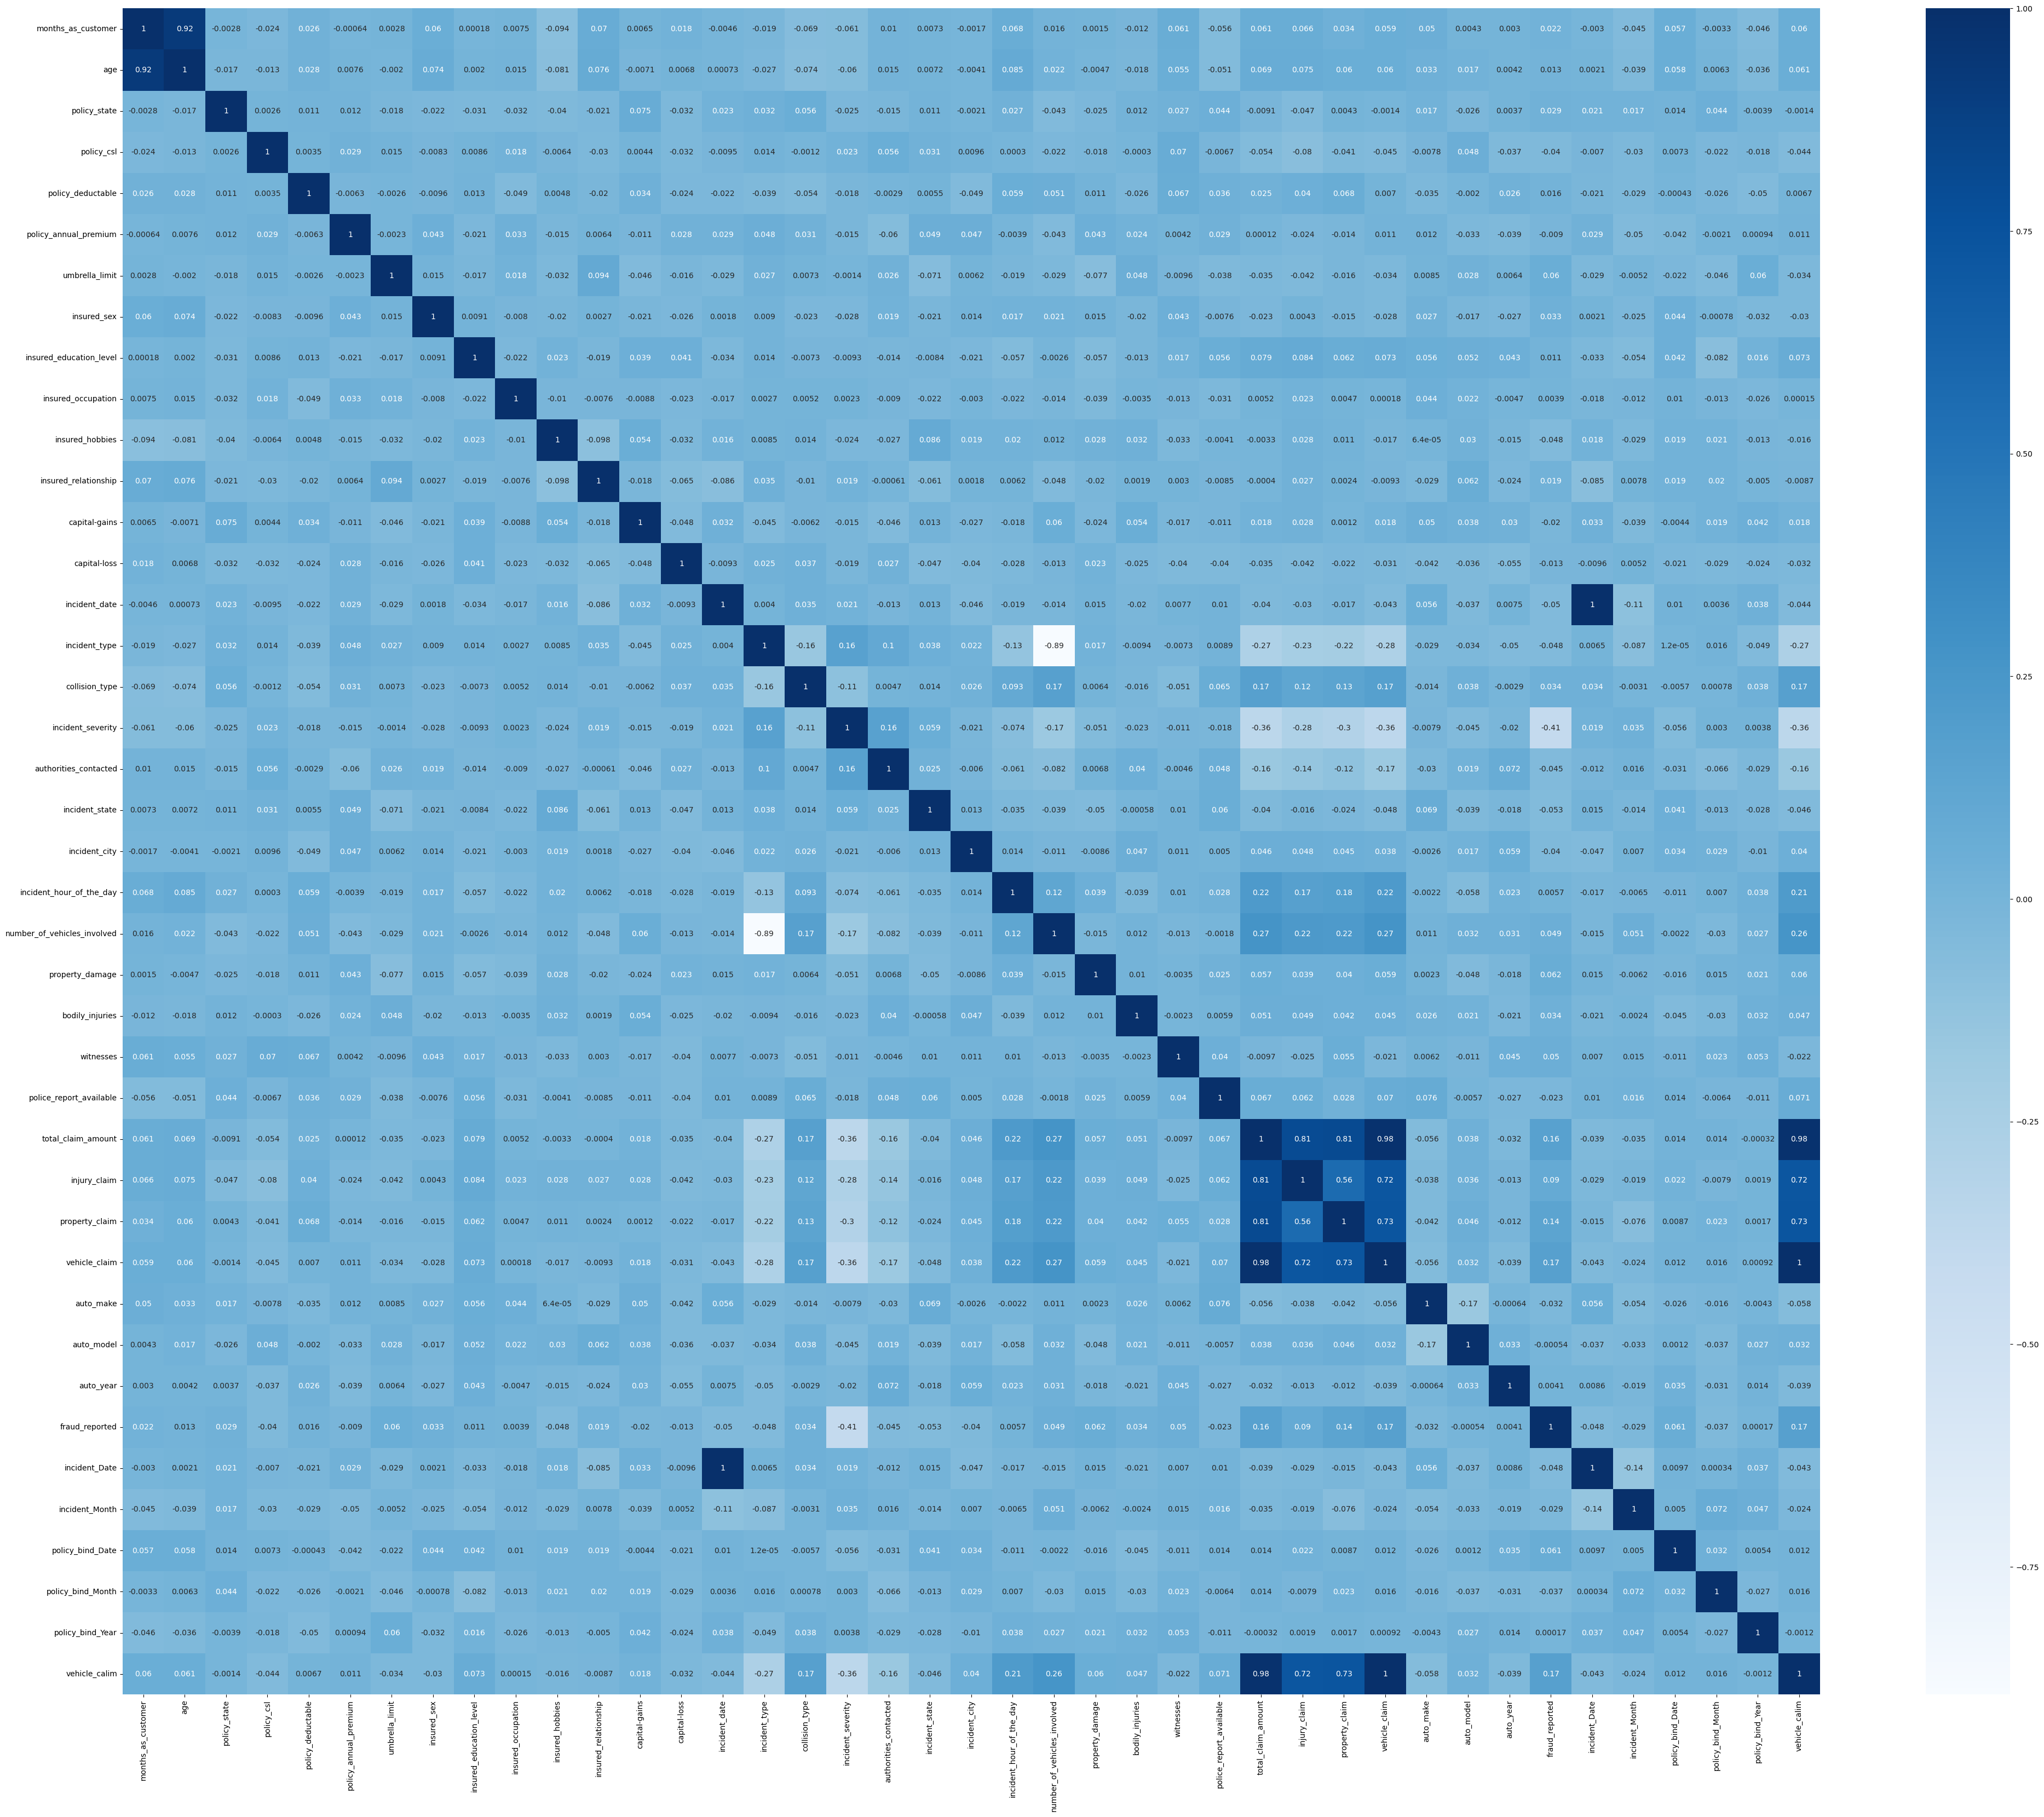

In [249]:
plt.figure(figsize=(50,40))
sns.heatmap(df.corr(),annot = True,cmap='Blues')

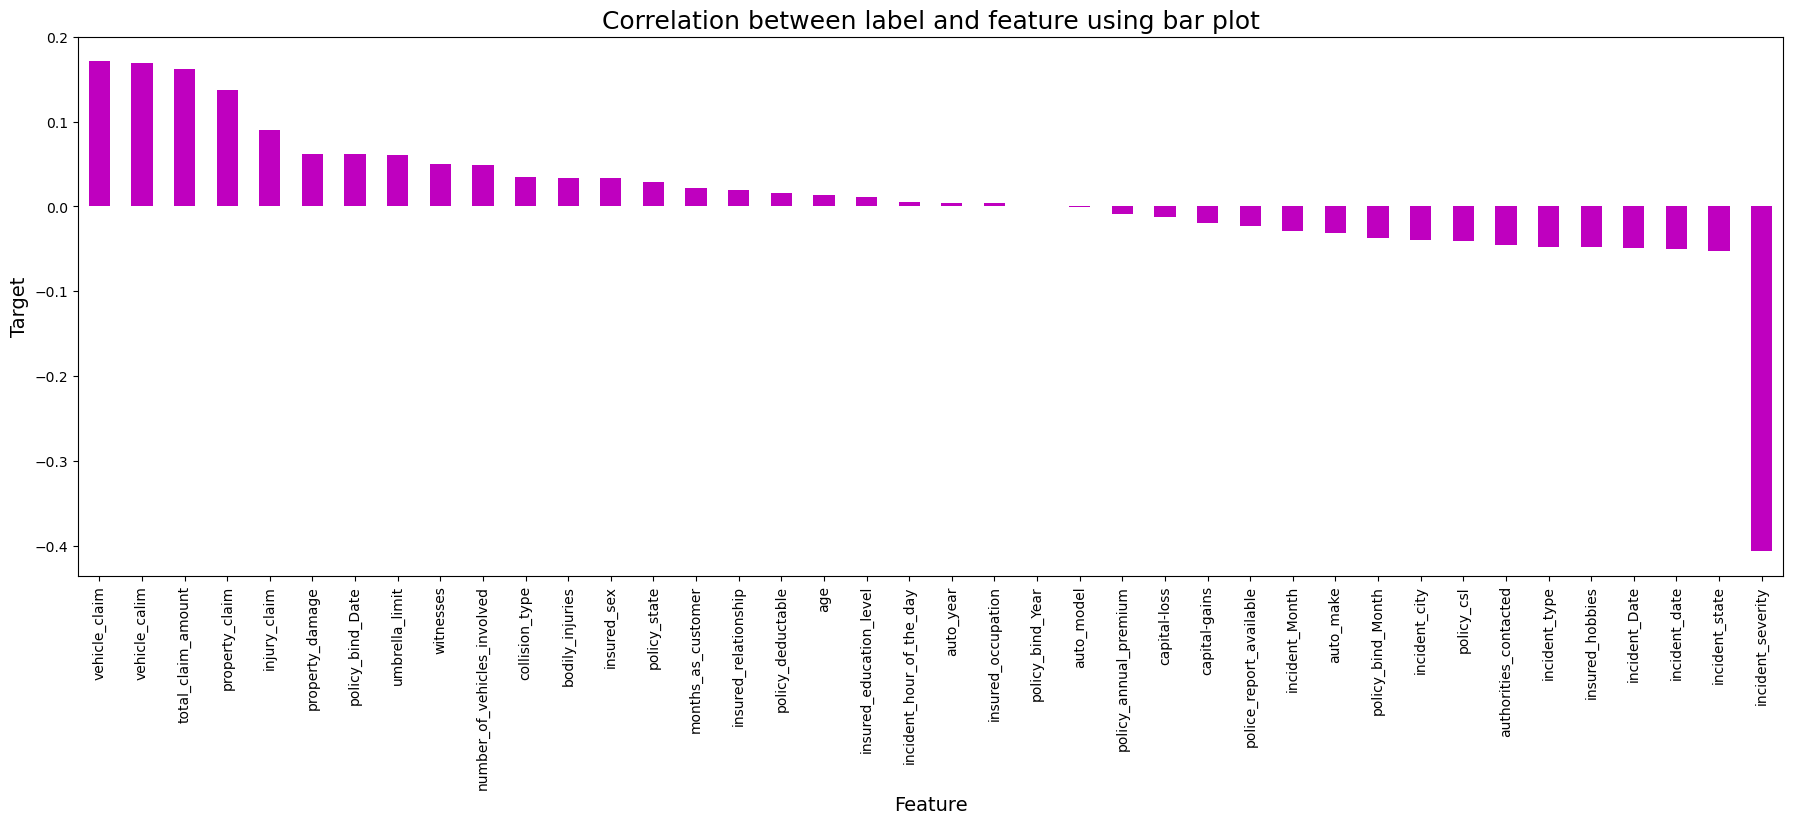

In [250]:
plt.figure(figsize=(22,7))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and feature using bar plot',fontsize=18)
plt.show()

From the above correlation graph we can see that vehicle_claim is positively correlated with the target and incident_severity is negatively correlated with the target and column auto_model is very less correlated with the target and also column policy_bind_year is not correlated with target at all

In [251]:
x = df.drop(['fraud_reported'],axis=1)
y = df['fraud_reported']

In [252]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.68475992, 0.64444444, 1.        , ..., 0.81818182, 0.96      ,
        0.63048869],
       [0.47599165, 0.51111111, 0.5       , ..., 0.45454545, 0.64      ,
        0.03307544],
       [0.27974948, 0.22222222, 1.        , ..., 0.72727273, 0.4       ,
        0.26008579],
       ...,
       [0.27139875, 0.33333333, 1.        , ..., 0.09090909, 0.52      ,
        0.6360264 ],
       [0.95615866, 0.95555556, 0.        , ..., 0.90909091, 0.84      ,
        0.42863875],
       [0.9519833 , 0.91111111, 1.        , ..., 0.90909091, 0.24      ,
        0.0348468 ]])

In [253]:
y.value_counts()

0    750
1    246
Name: fraud_reported, dtype: int64

In [254]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [255]:
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

In [256]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

In [257]:
maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)*100
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ",maxAccu,"on Random_state ",maxRS)

Best Accuracy is  79.11111111111111 on Random_state  41


In [258]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.30,random_state=maxRS)

In [259]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
y_pred = RFC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.9022222222222223
Confusion Matrix:  [[209  18]
 [ 26 197]]
Classification Report:                precision    recall  f1-score   support

           0       0.89      0.92      0.90       227
           1       0.92      0.88      0.90       223

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [260]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.7911111111111111
Confusion Matrix:  [[168  59]
 [ 35 188]]
Classification Report:                precision    recall  f1-score   support

           0       0.83      0.74      0.78       227
           1       0.76      0.84      0.80       223

    accuracy                           0.79       450
   macro avg       0.79      0.79      0.79       450
weighted avg       0.79      0.79      0.79       450



In [261]:
knn =  KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.6644444444444444
Confusion Matrix:  [[ 84 143]
 [  8 215]]
Classification Report:                precision    recall  f1-score   support

           0       0.91      0.37      0.53       227
           1       0.60      0.96      0.74       223

    accuracy                           0.66       450
   macro avg       0.76      0.67      0.63       450
weighted avg       0.76      0.66      0.63       450



In [262]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.9
Confusion Matrix:  [[204  23]
 [ 22 201]]
Classification Report:                precision    recall  f1-score   support

           0       0.90      0.90      0.90       227
           1       0.90      0.90      0.90       223

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



In [263]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_pred = DTC.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.8533333333333334
Confusion Matrix:  [[190  37]
 [ 29 194]]
Classification Report:                precision    recall  f1-score   support

           0       0.87      0.84      0.85       227
           1       0.84      0.87      0.85       223

    accuracy                           0.85       450
   macro avg       0.85      0.85      0.85       450
weighted avg       0.85      0.85      0.85       450



In [264]:
ADA=AdaBoostClassifier()
ADA.fit(x_train,y_train)
y_pred = ADA.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.86
Confusion Matrix:  [[196  31]
 [ 32 191]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.86      0.86       227
           1       0.86      0.86      0.86       223

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



In [265]:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
y_pred = BG.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test,y_pred))
print("Classification Report: ", classification_report(y_test,y_pred))

Accuracy score:  0.88
Confusion Matrix:  [[206  21]
 [ 33 190]]
Classification Report:                precision    recall  f1-score   support

           0       0.86      0.91      0.88       227
           1       0.90      0.85      0.88       223

    accuracy                           0.88       450
   macro avg       0.88      0.88      0.88       450
weighted avg       0.88      0.88      0.88       450



In [266]:
score=cross_val_score(RFC,x,y,cv=5)
print(score)
print(score.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score.mean()))

[0.72666667 0.83       0.92666667 0.93       0.94      ]
0.8706666666666667
Difference between accuracy score and cross validation score is:  0.009333333333333305


In [267]:
score1=cross_val_score(LR,x,y)
print(score1)
print(score1.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score1.mean()))

[0.71333333 0.72333333 0.73666667 0.77333333 0.76333333]
0.742
Difference between accuracy score and cross validation score is:  0.138


In [268]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score2.mean()))

[0.65       0.64       0.68666667 0.68333333 0.68333333]
0.6686666666666667
Difference between accuracy score and cross validation score is:  0.21133333333333326


In [269]:
score3=cross_val_score(GBC,x,y)
print(score3)
print(score3.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score3.mean()))

[0.75666667 0.83333333 0.91333333 0.92666667 0.92      ]
0.8700000000000001
Difference between accuracy score and cross validation score is:  0.009999999999999898


In [270]:
score4=cross_val_score(DTC,x,y)
print(score4)
print(score4.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score4.mean()))

[0.76666667 0.81666667 0.86666667 0.87333333 0.89      ]
0.8426666666666666
Difference between accuracy score and cross validation score is:  0.03733333333333344


In [271]:
score5=cross_val_score(ADA,x,y)
print(score5)
print(score5.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score5.mean()))

[0.71       0.77333333 0.92333333 0.93666667 0.95333333]
0.8593333333333334
Difference between accuracy score and cross validation score is:  0.02066666666666661


In [272]:
score6=cross_val_score(BG,x,y)
print(score6)
print(score6.mean())
print("Difference between accuracy score and cross validation score is: ",(accuracy_score(y_test,y_pred)-score6.mean()))

[0.78666667 0.83       0.89333333 0.88666667 0.91333333]
0.8619999999999999
Difference between accuracy score and cross validation score is:  0.018000000000000127


Since the difference between accuracy score and cross validation score for RandomForestClassifier is minimum  so i am selecting it as the best working model now tuning the model

In [273]:
param_grid = {'n_estimators':[100], 
              'criterion':['gini'], 
              'max_depth':[None], 
              'min_samples_split':[2], 
              'min_samples_leaf':[1], 
              'min_weight_fraction_leaf':[0.0], 
              'max_features':['sqrt'], 
              'max_leaf_nodes':[None], 
              'min_impurity_decrease':[0.0], 
              'bootstrap':[True], 
              'oob_score':[False], 
              'n_jobs':[None], 
              'random_state':[None], 
              'verbose':[0], 
              'warm_start':[False], 'class_weight':[None], 'ccp_alpha':[0.0], 'max_samples':[None]
             }

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
GSCV=GridSearchCV(RandomForestClassifier(),param_grid,cv=18)

In [276]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=18, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'ccp_alpha': [0.0],
                         'class_weight': [None], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [None], 'max_samples': [None],
                         'min_impurity_decrease': [0.0],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100], 'n_jobs': [None],
                         'oob_score': [False], 'random_state': [None],
                         'verbose': [0], 'warm_start': [False]})

In [277]:
GSCV.best_params_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [278]:
final = RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
final.fit(x_train,y_train)
pred = final.predict(x_test)
print("Accuracy Score: " , accuracy_score(y_test,pred))

Accuracy Score:  0.9133333333333333


As we can see that accuracy is increased from 90.22 to 91.33% so saving our model

In [279]:
import joblib
joblib.dump(final, "Fraud Detection.pkl")

['Fraud Detection.pkl']

In [280]:
model = joblib.load("Fraud Detection.pkl")
prediction=final.predict(x_test)
prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,

In [281]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = a
df

Predicted  Original
0            1         1
1            1         1
2            1         1
3            0         0
4            1         1
..         ...       ...
445          0         1
446          0         0
447          0         1
448          0         0
449          0         0

[450 rows x 2 columns]

In [282]:
conclusion=pd.DataFrame([final.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  440  441  \
Predicted    1    1    1    0    1    0    1    1    1    0  ...    0    1   
Original     1    1    1    0    1    0    1    1    1    0  ...    0    1   

           442  443  444  445  446  447  448  449  
Predicted    0    1    0    0    0    0    0    0  
Original     0    1    0    1    0    1    0    0  

[2 rows x 450 columns]

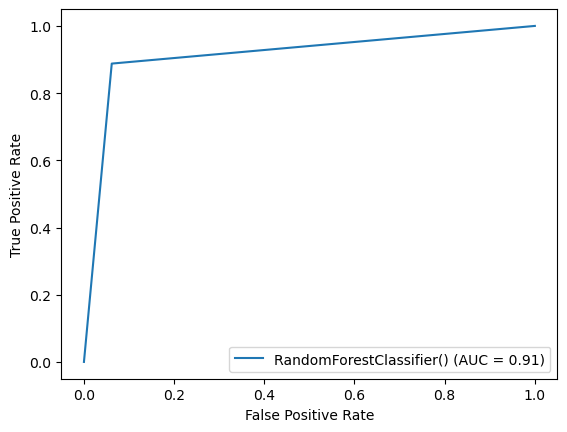

In [283]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final)
display.plot()

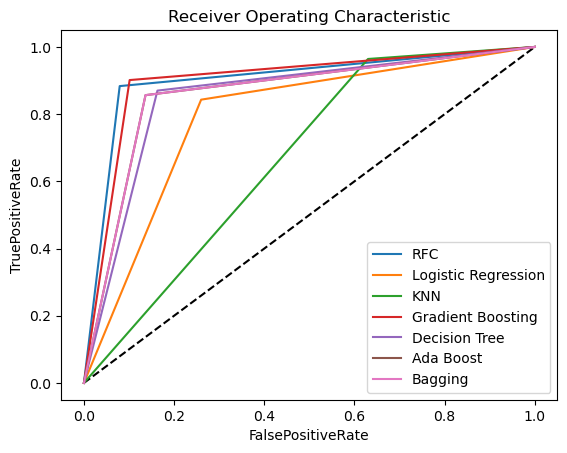

In [284]:
y_pred_prob1 = RFC.predict(x_test)
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = LR.predict(x_test)
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

y_pred_prob3 = knn.predict(x_test)
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = GBC.predict(x_test)
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)

y_pred_prob5 = DTC.predict(x_test)
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

y_pred_prob6 = ADA.predict(x_test)
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

y_pred_prob7 = BG.predict(x_test)
fpr7 , tpr7, thresholds7 = roc_curve(y_test, y_pred_prob7)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "RFC")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "Gradient Boosting")
plt.plot(fpr5, tpr5, label= "Decision Tree")
plt.plot(fpr6, tpr6, label= "Ada Boost")
plt.plot(fpr6, tpr6, label= "Bagging")
plt.legend()
plt.xlabel("FalsePositiveRate")
plt.ylabel("TruePositiveRate")
plt.title('Receiver Operating Characteristic')
plt.show()